## Big Data, Machine Learning, with Applications to Economics and Finance. Preliminary submission


## Part 0
Report on your data (2–4 pages). In this report, you need to show that you have explored the data to address all issues related to: missing values, outliers, treatment of categorical variables, possible transformation to continuous variables, feature selection, etc. At a minimum, you are expected to provide relevant graphs of your dependent variable, as well as graphs and descriptive statistics for all variables in your analysis. You are also expected to select a hold-out sample for testing purposes. Once selected, the holdout sample cannot be changed.

### First, let's import requiring modules and open our datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
import os

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']

In [2]:
appearances = pd.read_csv('appearances.csv')
appearances.head(2)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2483937_52453,2483937,52453,28095,28095,2014-08-08,Haris Handzic,RU1,0,0,0,0,90
1,2479929_67064,2479929,67064,28095,4128,2014-08-03,Felicio Brown Forbes,RU1,0,0,0,0,90


In [3]:
club_games = pd.read_csv('club_games.csv')
club_games.head(2)

,club_id,game_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,27,2229332,2,-1,Jupp Heynckes,16,1,-1,Jürgen Klopp,Home,1
1,131,2244388,3,-1,Tito Vilanova,418,2,-1,José Mourinho,Home,1


In [4]:
clubs = pd.read_csv('clubs.csv')
clubs.head(2)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,url
0,1032,fc-reading,Fc Reading,GB1,33.66,26,25.9,12,46.2,6,Select Car Leasing Stadium,24161,+£8.37m,Brian McDermott,https://www.transfermarkt.co.uk/fc-reading/sta...
1,2323,orduspor,Orduspor,TR1,NaN,0,NaN,0,NaN,0,19 Eylül Stadyum,11024,+-0,Héctor Cúper,https://www.transfermarkt.co.uk/orduspor/start...


In [5]:
competitions = pd.read_csv('competitions.csv')
competitions.head(2)

,competition_id,competition_code,name,type,sub_type,country_id,country_name,country_latitude,country_longitude,domestic_league_code,confederation,url
0,L1,bundesliga,Bundesliga,domestic_league,first_tier,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/bundesliga/sta...
1,DFB,dfb-pokal,Dfb Pokal,domestic_cup,domestic_cup,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/dfb-pokal/star...


In [6]:
game_events = pd.read_csv('game_events.csv')
game_events.head(2)

,game_id,minute,type,club_id,player_id,description,player_in_id
0,2229332,6,Goals,27,34572,", Right-footed shot, 1. Tournament Goal",-1
1,2229332,11,Goals,27,58358,", Tap-in, 1. Tournament Goal",-1


In [7]:
games = pd.read_csv('games.csv')
games.head(2)

,game_id,competition_id,competition_type,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,aggregate,home_club_position,away_club_position,club_home_name,club_away_name,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url
0,2229332,DFL,other,2012,Final,2012-08-12,27,16,2,1,2:1,-1,-1,Fc Bayern Munchen,Borussia Dortmund,Jupp Heynckes,Jürgen Klopp,Allianz Arena,69000,Michael Weiner,https://www.transfermarkt.co.uk/spielbericht/i...
1,2244388,SUC,other,2012,final 1st leg,2012-08-22,131,418,3,2,3:2,-1,-1,Fc Barcelona,Real Madrid,Tito Vilanova,José Mourinho,Spotify Camp Nou,91728,Carlos Clos Gómez,https://www.transfermarkt.co.uk/spielbericht/i...


In [8]:
player_valuations = pd.read_csv('player_valuations.csv')
player_valuations.head(2)

,date,datetime,dateweek,player_id,current_club_id,market_value_in_eur,player_club_domestic_competition_id
0,2013-08-07,2013-08-07,2013-08-05,99946,1095,150000,FR1
1,2014-01-13,2014-01-13,2014-01-13,99946,1095,100000,FR1


In [9]:
players = pd.read_csv('players.csv')
players.head(2)

,player_id,name,current_club_id,current_club_name,country_of_citizenship,country_of_birth,city_of_birth,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,agent_name,contract_expiration_date,current_club_domestic_competition_id,first_name,last_name,player_code,image_url,last_season,url
0,134354,Ian Raeymaekers,498,Ksc Lokeren,Belgium,Belgium,Aalst,1995-01-30,Attack,Centre-Forward,Right,0,NaN,50000.0,NaN,NaN,BE1,Ian,Raeymaekers,ian-raeymaekers,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/ian-raeymaeker...
1,99946,Mohamed Camara,1095,Es Troyes Ac,Guinea,Guinea,Conakry,1990-09-20,Attack,Centre-Forward,Right,180,NaN,300000.0,NaN,NaN,FR1,Mohamed,Camara,mohamed-camara,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/mohamed-camara...


### Now, let's learn what data we have

In [10]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28226 entries, 0 to 28225
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             28226 non-null  int64  
 1   name                                  28226 non-null  object 
 2   current_club_id                       28226 non-null  int64  
 3   current_club_name                     28226 non-null  object 
 4   country_of_citizenship                28225 non-null  object 
 5   country_of_birth                      26388 non-null  object 
 6   city_of_birth                         26400 non-null  object 
 7   date_of_birth                         28193 non-null  object 
 8   position                              28226 non-null  object 
 9   sub_position                          24808 non-null  object 
 10  foot                                  26055 non-null  object 
 11  height_in_cm   

In [11]:
player_valuations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418592 entries, 0 to 418591
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   date                                 418592 non-null  object
 1   datetime                             418592 non-null  object
 2   dateweek                             418592 non-null  object
 3   player_id                            418592 non-null  int64 
 4   current_club_id                      418592 non-null  int64 
 5   market_value_in_eur                  418592 non-null  int64 
 6   player_club_domestic_competition_id  418592 non-null  object
dtypes: int64(3), object(4)
memory usage: 22.4+ MB


In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61174 entries, 0 to 61173
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 61174 non-null  int64 
 1   competition_id          61174 non-null  object
 2   competition_type        61174 non-null  object
 3   season                  61174 non-null  int64 
 4   round                   61174 non-null  object
 5   date                    61174 non-null  object
 6   home_club_id            61174 non-null  int64 
 7   away_club_id            61174 non-null  int64 
 8   home_club_goals         61174 non-null  int64 
 9   away_club_goals         61174 non-null  int64 
 10  aggregate               61174 non-null  object
 11  home_club_position      61174 non-null  int64 
 12  away_club_position      61174 non-null  int64 
 13  club_home_name          50801 non-null  object
 14  club_away_name          51873 non-null  object
 15  ho

In [13]:
game_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555917 entries, 0 to 555916
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   game_id       555917 non-null  int64 
 1   minute        555917 non-null  int64 
 2   type          555917 non-null  object
 3   club_id       555917 non-null  int64 
 4   player_id     555917 non-null  int64 
 5   description   168928 non-null  object
 6   player_in_id  555917 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 29.7+ MB


In [14]:
competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   competition_id        43 non-null     object 
 1   competition_code      43 non-null     object 
 2   name                  43 non-null     object 
 3   type                  43 non-null     object 
 4   sub_type              43 non-null     object 
 5   country_id            43 non-null     int64  
 6   country_name          36 non-null     object 
 7   country_latitude      43 non-null     float64
 8   country_longitude     43 non-null     float64
 9   domestic_league_code  36 non-null     object 
 10  confederation         43 non-null     object 
 11  url                   43 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.2+ KB


In [15]:
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  411 non-null    int64  
 1   club_code                411 non-null    object 
 2   name                     411 non-null    object 
 3   domestic_competition_id  411 non-null    object 
 4   total_market_value       125 non-null    float64
 5   squad_size               411 non-null    int64  
 6   average_age              382 non-null    float64
 7   foreigners_number        411 non-null    int64  
 8   foreigners_percentage    371 non-null    float64
 9   national_team_players    411 non-null    int64  
 10  stadium_name             411 non-null    object 
 11  stadium_seats            411 non-null    int64  
 12  net_transfer_record      411 non-null    object 
 13  coach_name               170 non-null    object 
 14  url                      4

In [16]:
club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122348 entries, 0 to 122347
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   club_id                122348 non-null  int64 
 1   game_id                122348 non-null  int64 
 2   own_goals              122348 non-null  int64 
 3   own_position           122348 non-null  int64 
 4   own_manager_name       121026 non-null  object
 5   opponent_id            122348 non-null  int64 
 6   opponent_goals         122348 non-null  int64 
 7   opponent_position      122348 non-null  int64 
 8   opponent_manager_name  121026 non-null  object
 9   hosting                122348 non-null  object
 10  is_win                 122348 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 10.3+ MB


In [17]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122467 entries, 0 to 1122466
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1122467 non-null  object
 1   game_id                 1122467 non-null  int64 
 2   player_id               1122467 non-null  int64 
 3   player_club_id          1122467 non-null  int64 
 4   player_current_club_id  1122467 non-null  int64 
 5   date                    1110560 non-null  object
 6   player_name             1122238 non-null  object
 7   competition_id          1122467 non-null  object
 8   yellow_cards            1122467 non-null  int64 
 9   red_cards               1122467 non-null  int64 
 10  goals                   1122467 non-null  int64 
 11  assists                 1122467 non-null  int64 
 12  minutes_played          1122467 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 111.3+ MB


### Data processing with addressing all issues related to: missing values, outliers, treatment of categorical variables, possible transformation to continuous variables, feature selection, etc.

Here the preliminary data processing is completed. This job will be continued after data visualization.

In [18]:
# Let's transform date columns into date format
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
players['contract_expiration_date'] = pd.to_datetime(players['contract_expiration_date'])
player_valuations['datetime'] = pd.to_datetime(player_valuations['datetime'], format="%Y-%m-%d")
appearances['datetime'] = pd.to_datetime(appearances['date'], format="%Y-%m-%d")

# Also, we would like to have year columns in some tables
player_valuations['year'] = player_valuations['datetime'].dt.year
appearances['year'] = appearances['datetime'].dt.year

# It's time to work a bit with missing values. Let's drop players with no date of birth and no contract expiration date
players = players[players['date_of_birth'].isnull() == False]
players = players[players['contract_expiration_date'].isnull() == False]

# Next step is to find players' age and remaining days of their contracts
now = datetime.now()
players['age'] = (now - players['date_of_birth']).apply(lambda x: x.days) / 365.25
players['age'] = players['age'].round().astype(int)

players['term_days_remaining'] = (players['contract_expiration_date']- now).apply(lambda x: x.days)

# We also want to add position to player valuations and appearances to make nice visualisation
position = players.copy()
position = position.drop(['name', 'current_club_id', 'current_club_name', 'country_of_citizenship', 'country_of_birth', 'city_of_birth', 'date_of_birth', 'foot', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'agent_name', 'contract_expiration_date', 'current_club_domestic_competition_id', 'first_name', 'last_name', 'player_code', 'image_url', 'last_season', 'url', 'age'], axis=1)
player_valuations = player_valuations.merge(position, left_on='player_id', right_on='player_id')

value = players.copy()
value = value.drop(['name', 'current_club_id', 'current_club_name', 'country_of_citizenship', 'country_of_birth', 'city_of_birth', 'date_of_birth', 'foot', 'height_in_cm', 'sub_position', 'highest_market_value_in_eur', 'agent_name', 'contract_expiration_date', 'current_club_domestic_competition_id', 'first_name', 'last_name', 'player_code', 'image_url', 'last_season', 'url', 'age'], axis=1)
appearances_1 = value.merge(appearances, left_on='player_id', right_on='player_id')

### Let's make some graphs and descriptive statistics so as to understand which features we could use in the analysis

#### Clubs Total Market Value
One of the obvious ideas why football players' transfer value could differ is the clubs they play for. The possible reasons are the league, the coach, the level of other players in the team, etc.

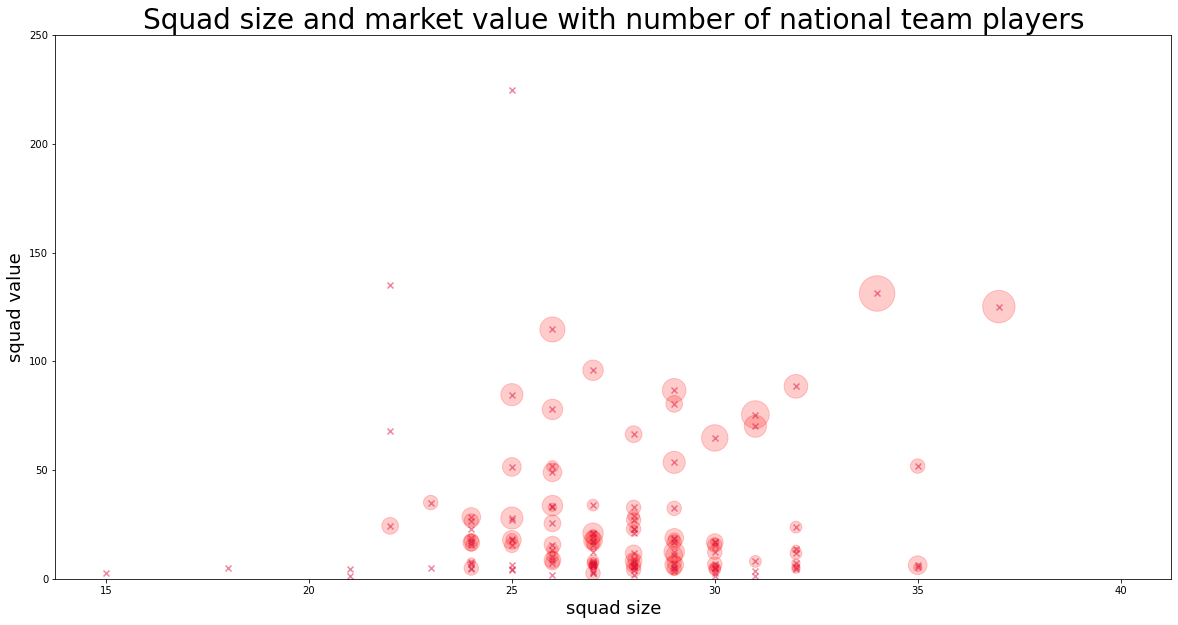

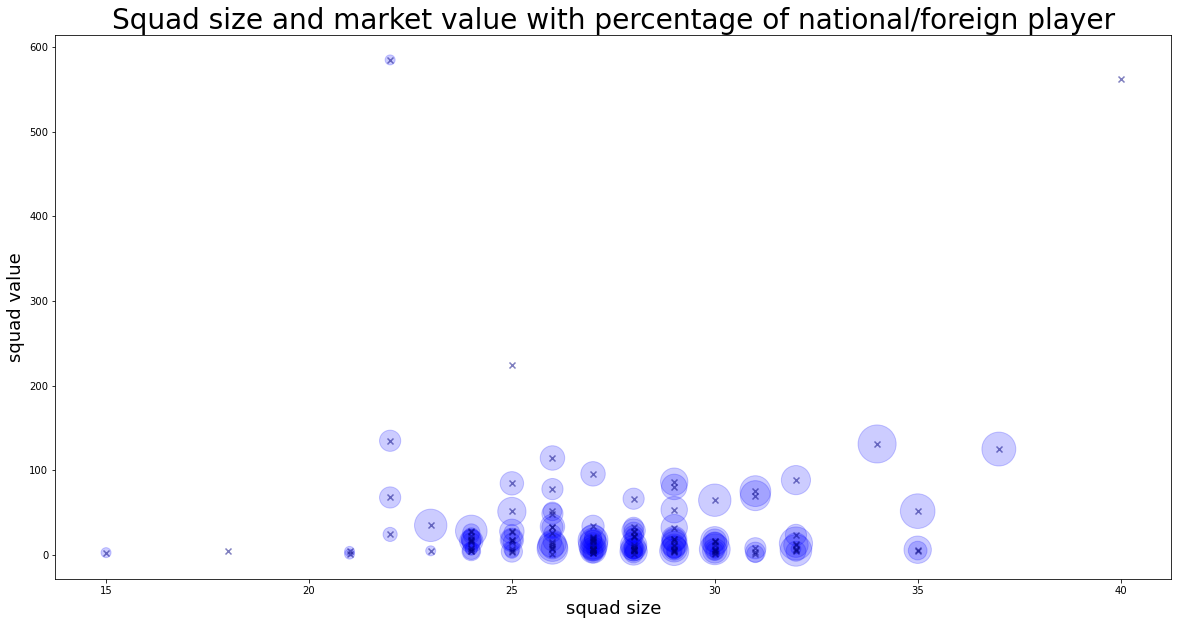

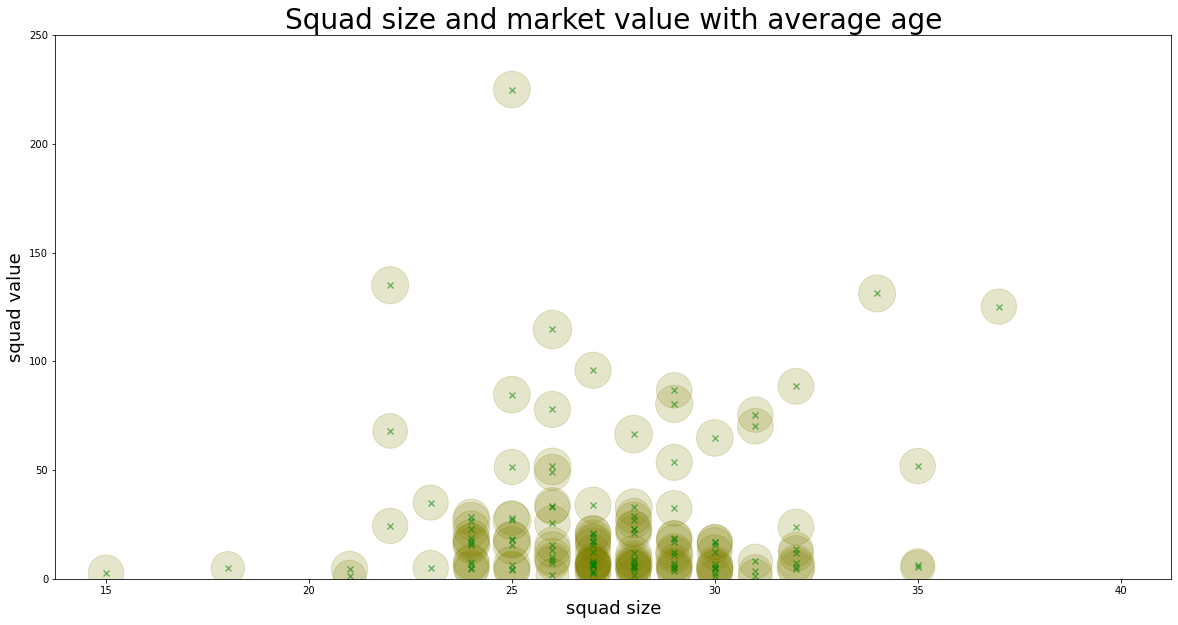

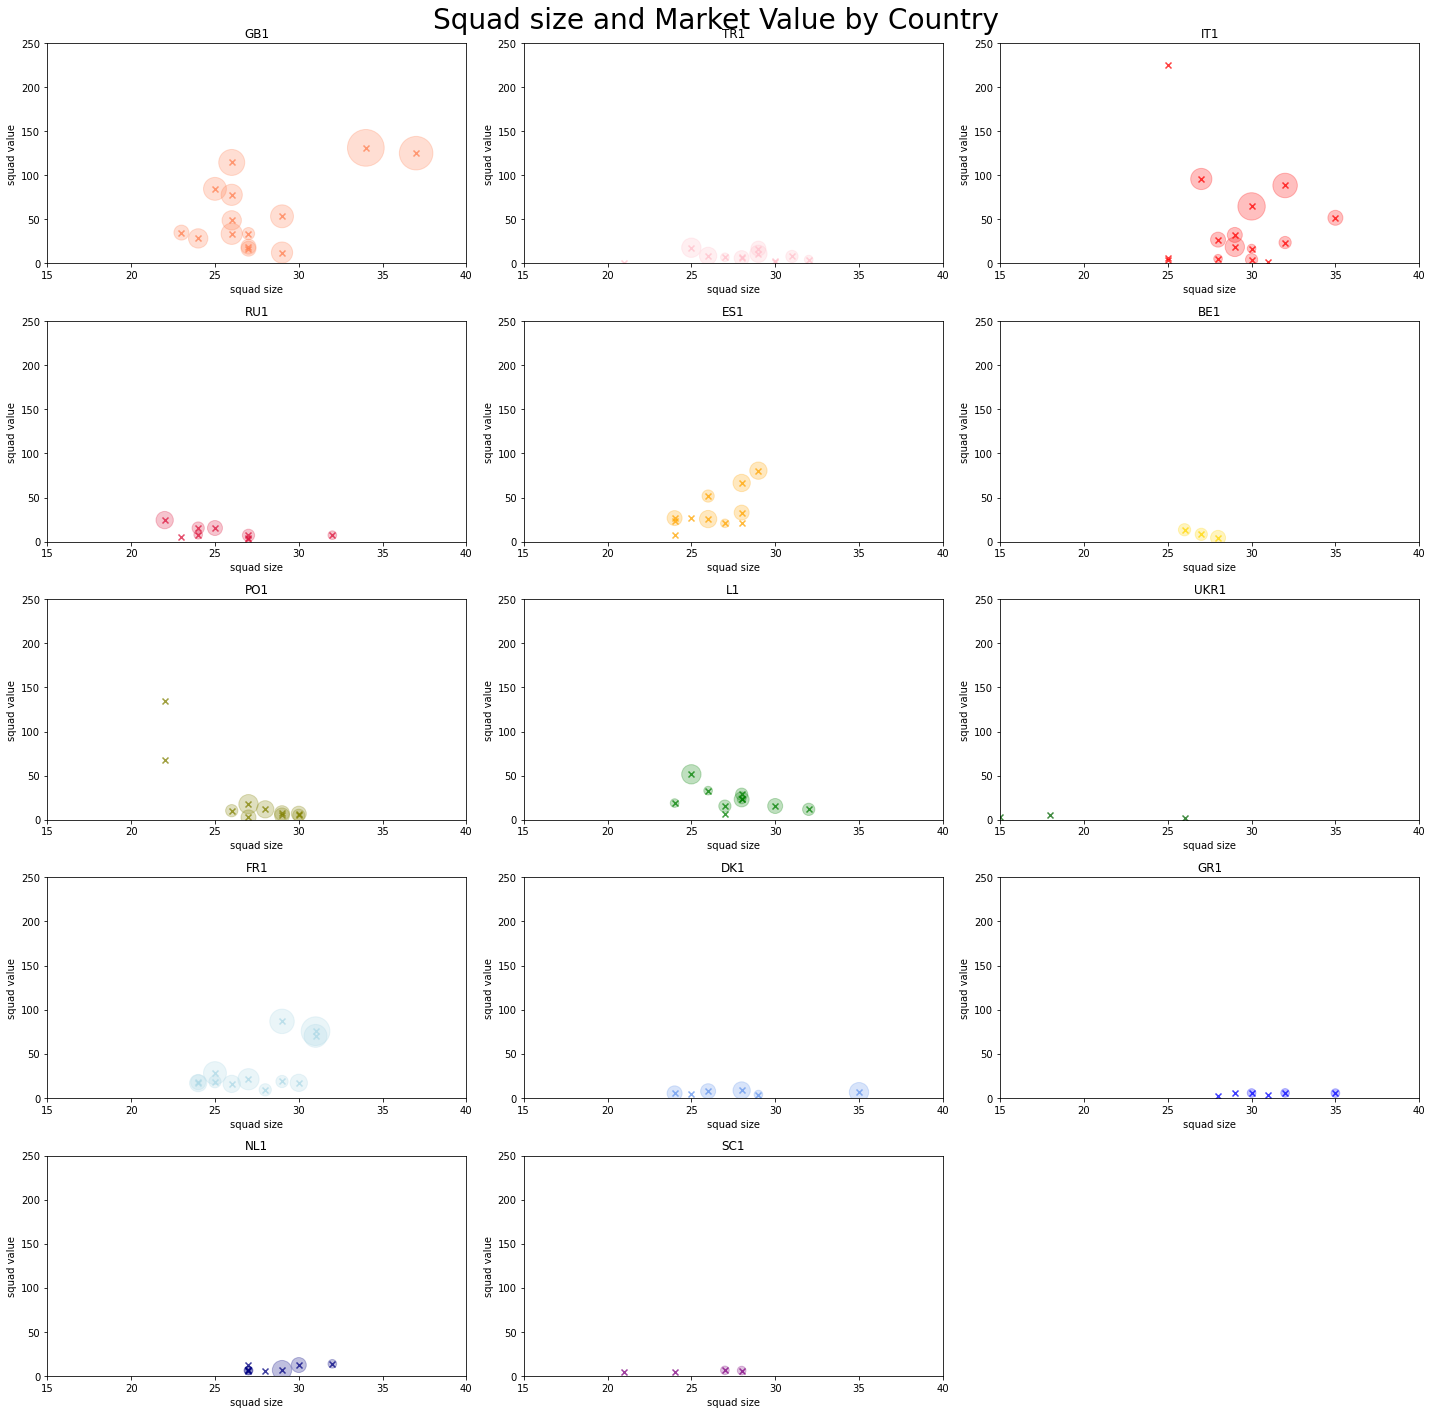

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(clubs['squad_size'], y = clubs['total_market_value'], c='red', alpha=0.2, s = clubs['national_team_players']*70)
plt.scatter(clubs['squad_size'], y = clubs['total_market_value'], c='crimson', alpha=0.5, marker='x')
plt.ylim(0, 250)
plt.xlabel('squad size', fontsize=18); plt.ylabel('squad value', fontsize=18)
plt.title('Squad size and market value with number of national team players', fontsize=28)
plt.show()

# Visualizion of squad size, value and national team players
plt.figure(figsize=(20,10))
plt.scatter(clubs['squad_size'], y=clubs['total_market_value'], c='blue', alpha=0.2, s=clubs['foreigners_number']*50)
plt.scatter(clubs['squad_size'], y=clubs['total_market_value'], c='navy', alpha=0.5, marker='x')
plt.xlabel('squad size', fontsize=18); plt.ylabel('squad value', fontsize=18)
plt.title('Squad size and market value with percentage of national/foreign player', fontsize=28)
plt.show()

# Visualizion of squad size, value and national team players
plt.figure(figsize=(20,10))
plt.scatter(clubs['squad_size'], y=clubs['total_market_value'], c='olive', alpha=0.2, s=clubs['average_age']*50)
plt.scatter(clubs['squad_size'], y=clubs['total_market_value'], c='green', alpha=0.5, marker='x')
plt.ylim(0,250)
plt.xlabel('squad size',fontsize=18); plt.ylabel('squad value',fontsize=18)
plt.title('Squad size and market value with average age',fontsize=28)
plt.show()

# Visualizion of squad size, value and national team players
n=1;colour=['coral','pink','r','crimson','orange','gold','olive','g','darkgreen','lightblue','cornflowerblue','b','navy','purple']
leagues=clubs.domestic_competition_id.unique()

plt.figure(figsize=(20,20))
plt.suptitle("Squad size and Market Value by Country", size=28)
for league in leagues:
    plt.subplot(5,3,n);n=n+1
    clubs_1 = clubs[(clubs.domestic_competition_id==league)]
    plt.scatter(clubs_1['squad_size'], y=clubs_1['total_market_value'], label=league, color=colour[n-2], alpha=0.25, s=clubs_1['national_team_players']*75)
    plt.scatter(clubs_1['squad_size'], y=clubs_1['total_market_value'], color=colour[n-2], alpha=0.75, marker='x')
    plt.xlabel('squad size'); plt.ylabel('squad value')
    plt.ylim(0,250);plt.xlim(15,40)
    plt.title(league);
    plt.tight_layout()
plt.show()

The charts show that all the teams have from 15 to 40 players with the squad value from 0 to 250 with an outlier of 600. On average, the more the squad and the more the number of national team players and foreign players, the bigger the squad value, while surely there are exceptions.
The graphs show a huge difference in squade values by leagues and all the leagues have 1-3 dominant clubs that contribute to the total market value more than other.
All that suggests that club must be an important factor that determines the player's value.

#### Players valuation over time
Next, we should observe the overall market to observe some market features that affect transfer market values: overall rise of prices, player's position, etc.

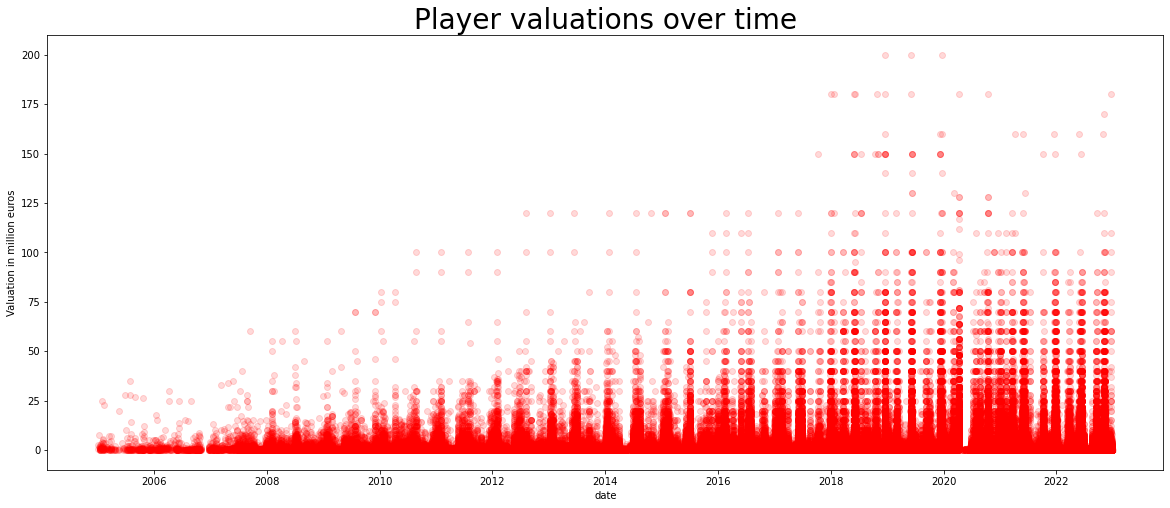

InvalidIndexError: (slice(None, None, None), None)

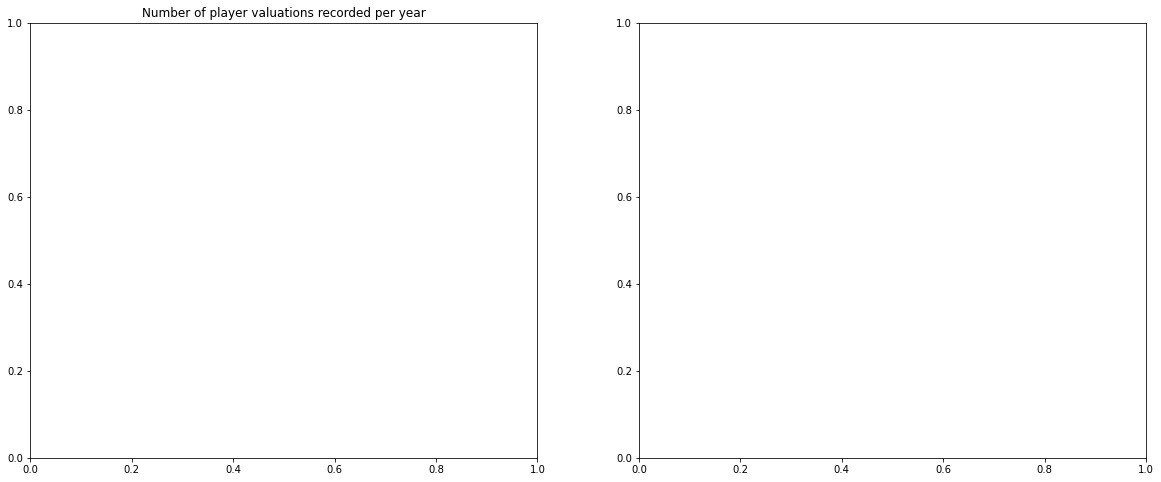

In [20]:
#filter range
player_valuations = player_valuations[(player_valuations.year > 2004 ) & (player_valuations.year < 2023 )]
high_value_player_valuations = player_valuations[(player_valuations.market_value_in_eur > 40000000 )]
positions=players.position.unique()

# Visualize of valuation data over time
plt.figure(figsize=(20,8))
plt.scatter(player_valuations['datetime'],y=player_valuations['market_value_in_eur']/1000000, c='red',alpha=0.15)
plt.xlabel('date');plt.ylabel('Valuation in million euros')
plt.title('Player valuations over time',fontsize=28)
plt.show()

# Visualize of valuation data over time
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
yeargroups1 = player_valuations.loc[:,['market_value_in_eur', 'year']].groupby(['year']).count() \
    .sort_values(by='year', ascending=True)
yeargroups2 = player_valuations.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).sum() \
    .sort_values(by='year', ascending=True)
yeargroups3 = player_valuations.loc[:,['market_value_in_eur', 'year']].groupby(['year']).max() \
    .sort_values(by='year', ascending=True)
yeargroups4 = player_valuations.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).min() \
    .sort_values(by='year', ascending=True)
yeargroups5 = player_valuations.loc[:,['market_value_in_eur', 'year']].groupby(['year']).median() \
    .sort_values(by='year', ascending=True)
yeargroups6 = player_valuations.loc[:,['market_value_in_eur', 'year']].groupby(['year']).mean() \
    .sort_values(by='year', ascending=True)

plt.subplot(1, 2, 1)
plt.title('Number of player valuations recorded per year')
plt.plot(yeargroups1.index,yeargroups1,color='black')
plt.ylabel('Market value (million euros)')
plt.subplot(1, 2, 2)
plt.title('sum of player per year valuations')
plt.plot(yeargroups2.index,yeargroups2/1000000,color='red')
plt.ylabel('Market value (million euros)')
plt.show()
plt.figure(figsize=(20,8))
plt.title('Max versus average player valuation over time', fontsize=28)
plt.plot(yeargroups3.index,yeargroups3/1000000, color='r', label='max')
plt.plot(yeargroups5.index,yeargroups5/1000000, color='Gold', label='median')
plt.plot(yeargroups6.index,yeargroups6/1000000, color='Orange', label='mean')
plt.ylabel('Market value (million euros)')
plt.legend()
plt.show()

# valuation by position
plt.figure(figsize=(20,8))
n=1;colour=['yellow','r','orange','b','g']
for position in positions:
    plt.subplot(1,4,n);n=n+1
    player_valuations_1 = player_valuations[(player_valuations.position==position)]
    plt.scatter(player_valuations_1['datetime'], y=player_valuations_1['market_value_in_eur']/1000000, c=colour[n-1],alpha=0.15)
    plt.xlabel('year')
    plt.ylabel('valuations in million euros')
    plt.title(position+'Valuation over time')
    plt.ylim(0,200)
    plt.xticks(rotation=90, ha='right')
plt.show()

It could be seen from the charts that since 2005 the player valuations tend to grow rapidly. While the maximum value has considerably risen during this period, mean value has just slightly increased, while median value remains constant.
Looking at positions valuation separately, we could see that Attack players tend to have the highest value, while goalkeepers the lowest.

#### Player data visualization
The data visualised here is basically the reason why our dataset could be biased. The characteristics like height, position, main foot, etc. could considerably affect footbal players' market values.

In [ ]:
#overview of player dataset
#remove players with no Market Value
players_1 = players[players.highest_market_value_in_eur.isnull() == False]
#order by Market Value
players_1 = players_1.sort_values("highest_market_value_in_eur", ascending = False)
#filter by season and value
players_1 = players[players['last_season'] >= 2021]
players_1 = players_1[players_1['highest_market_value_in_eur'] >= 10000000]
high_value_players = players_1[(players_1.market_value_in_eur > 40000000 )]
positions=players.position.unique()

# Show player age distribution
f = plt.figure(figsize=(17,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(17,10)})
sns.histplot(x='age',data=players, binwidth=1,color='b')
plt.title("Age of all players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='age',data=high_value_players, binwidth=1,color='navy')
plt.title("Age of high value players",fontsize=18)
plt.xlabel('age'); plt.ylabel('number of players')

# Show player height distribution
players_3 = players_1[players_1.height_in_cm.isnull() == False]
f = plt.figure(figsize=(17,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(17,10)})
sns.histplot(x='height_in_cm',data=players_3, binwidth=1,color='b')
plt.title("Height of all players",fontsize=18)
plt.xlabel('height'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='height_in_cm',data=high_value_players, binwidth=1,color='navy')
plt.title("Height of high value players",fontsize=18)
plt.xlabel('height'); plt.ylabel('number of players')

# Show position data
players_1 = players_1.sort_values("position", ascending = True)
high_value_players_1 = high_value_players.sort_values("position", ascending = True)
f = plt.figure(figsize=(17,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
plt.title("position played",fontsize=18);plt.grid(True)
sns.histplot(x='position',data=players_1, binwidth=1,color='b')
plt.xlabel('position played'); plt.ylabel('number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='position',data=high_value_players_1, binwidth=1,color='navy')
plt.title("position played",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')

# Show subposition data
players_1 = players_1.sort_values("sub_position", ascending = True)
high_value_players_1 = high_value_players.sort_values("sub_position", ascending = True)
f = plt.figure(figsize=(17,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='sub_position',data=players_1, binwidth=1,color='b')
plt.title("sub position played by all players",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');
plt.subplot(1, 2, 2)
sns.histplot(x='sub_position',data=high_value_players_1, binwidth=1,color='navy')
plt.title("sub position played by high value players",fontsize=18);plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');

# Show  footedness data
players_1 = players_1.sort_values("foot", ascending = True)
high_value_players_1 = high_value_players_1.sort_values("foot", ascending = True)
f = plt.figure(figsize=(17,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='foot',data=players_1, binwidth=1,color='b')
plt.title("footedness amongst all players",fontsize=18);plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.subplot(1, 2, 2)
sns.histplot(x='foot',data=high_value_players_1, binwidth=1,color='navy')
plt.title("footedness amongst high value players",fontsize=18);plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.xticks(rotation=90, ha='right');

The distributions above show that the average age of football players is about 28 years. It also seems that at the age of 33-35 about the half of footbal players end their careers or go to other weak championships as the number of football players at this age decrease almost twice. If we consider just the most expensive players, the majority of them have the age of 24 which is the age when players normally show their best footbal play. As for height, while the most popular cohort is the height of 187, the biggest group of highly valued players have the height of 178 which could be explained by the fact that normally the highest players in the team are defenders and goalkeepers, while their value is the lowest. As for positions, the number of attack players is slightly bigger than defenders, while among high value players he number of attack players is almost two times higher which proves previous results that on average attack players are valued higher. The number of goalkeepers is the smallest in both groups. The majority of players are right footed and the footedness amongst all players and amongst high value players is almost the same.
Speaking generally, the distibutions of age is a skewed normal distribution and the distibutions of height is a normal distribution. Distibutions amongst high value players appear to be reflective of values within the entire dataset.

#### Appearance Visualizations
Player's appearance is probably the core reason for a transfer to happen and for transfer value to change. The average minutes played by the player, his goal and pass indicators and others may attract other clubs attention to the player and may motivate him to change the club he plays in and his club to demand highel or lower sum of money.

InvalidIndexError: (slice(None, None, None), None)

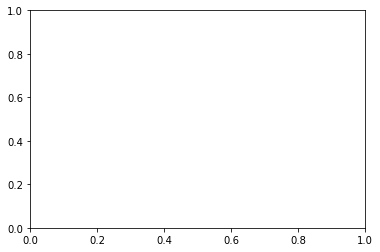

In [21]:
#filter range
appearances = appearances[(appearances.year > 2004 ) & (appearances.year < 2023 )]
high_value_appearances = appearances_1[(appearances_1.market_value_in_eur > 40000000 )]

#Goals, assists and cards
yeargroups1 = appearances.loc[:,['goals', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
yeargroups2 = appearances.loc[:,['assists', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
yeargroups3 = appearances.loc[:,['red_cards', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
yeargroups4 = appearances.loc[:,['yellow_cards', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
plt.plot(yeargroups1.index,yeargroups1,color='blue',label='goals')
plt.plot(yeargroups2.index,yeargroups2,color='green',label='assists')
plt.plot(yeargroups3.index,yeargroups3,color='red',label='red cards')
plt.plot(yeargroups4.index,yeargroups4,color='gold',label='yellow cards')
plt.xlabel("year")
plt.title('Minutes played',fontsize=28);plt.legend()
plt.show()

# Explore minutes played
plt.scatter(appearances['datetime'],y=appearances['minutes_played'],alpha=0.0025,color='b')
plt.xlabel("year");plt.ylabel('minutes played')
plt.title('Minutes played',fontsize=28)
plt.show()

# Explore minutes played
plt.scatter(high_value_appearances['datetime'],y=high_value_appearances['minutes_played'],alpha=0.1,color='r')
plt.xlabel("year");plt.ylabel('minutes played')
plt.title('High Value Player minutes played',fontsize=28)
plt.show()

Here we see that highly valued players play much more than players on  average which seems evident. The number of appearances tend to be rather constant over time.

#### Game Visualizations
Some clubs participate in transfers more often than others. Also, some leagues and competitions attract more attention of those who wish to accomplish a transfer. These and other statistics motivate us to pay attention to the data related to games.

InvalidIndexError: (slice(None, None, None), None)

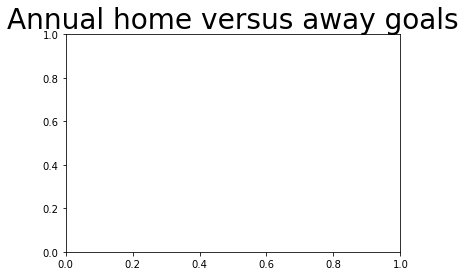

In [22]:
# add year to game valuations
games['datetime']=pd.to_datetime(games['date'], format="%Y-%m-%d")
games['year']=games['datetime'].dt.year

# filter range
games = games[(games.year > 2004) & (games.year < 2023)]

# annual home versus away goals
plt.title('Annual home versus away goals',fontsize=28)
yeargroups1 = games.loc[:,['home_club_goals', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
yeargroups2 = games.loc[:,['away_club_goals', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
plt.plot(yeargroups1.index,yeargroups1, color='blue', label='home goals')
plt.plot(yeargroups2.index,yeargroups2, color='red', label='away goals')
plt.legend()
plt.show()

# home goals by competition type
n=1;colour=['b','lightblue','cornflowerblue','b','navy']
competition_type=games.competition_type.unique()
for type in competition_type:
    plt.subplot(1,4,n);n=n+1
    games_1 = games[(games.competition_type==type)]
    plt.hist(games_1['home_club_goals'], color=colour[n-1])
    plt.ylim(0,14000);plt.xlim(0,10)
    plt.xlabel(type)
plt.show()

# away goals by competition type
n=1;colour=['yellow','pink','lightcoral','r','crimson','brick']
for type in competition_type:
    plt.subplot(1,4,n);n=n+1
    games_1 = games[(games.competition_type==type)]
    plt.hist(games_1['away_club_goals'],color=colour[n-1])
    plt.ylim(0,14000);plt.xlim(0,10)
    plt.xlabel(type)
plt.show()

# distribution of attendances
plt.hist(games['attendance'])
plt.title('Distribution of attendances',fontsize=28)
plt.xlabel('Attendance')
plt.show()

#### Data visualisation of market value by age
As can be seen, age affects the transfer value rather seriosly as many clubs are ready to overpay for those who are young and prospective and who are at their best age (middle 20's).

In [23]:
# market value by age
agegroups = players_1.loc[:,['market_value_in_eur', 'age']] \
    .groupby(['age']) \
    .mean() \
    .sort_values(by='market_value_in_eur', ascending=False)
sns.set(rc={'figure.figsize':(20,10)})
plt.ylabel('Market value')
sns.boxplot(x=players_1["age"], y=(players_1['market_value_in_eur'])/1000000)
plt.title('Average Market Value by age in Million Euros',fontsize=28)
plt.show()
# show Market Value for each position by age
positions = players_1.position.unique()
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(421);ax2 = f.add_subplot(422);ax3 = f.add_subplot(423);ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425);ax6 = f.add_subplot(426);ax7 = f.add_subplot(427);ax8 = f.add_subplot(428)
n=1
for position in positions:
    plt.subplot(4,2,n); n=n+1
    players_2 = players_1[players_1['position'] == position]
    agegroups = players_2.loc[:,['market_value_in_eur', 'age']].groupby(['age']).median().sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=players_2["age"], y=(players_2['market_value_in_eur'])/1000000)
    title=str(position+' player market value in million euros by age');plt.title(title)
    plt.subplot(4,2,n); n=n+1
    high_value_players_2 = high_value_players[high_value_players['position'] == position]
    agegroups = high_value_players.loc[:,['market_value_in_eur', 'age']].groupby(['age']).median().sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=high_value_players_2["age"], y=(high_value_players_2['market_value_in_eur'])/1000000)
    title=str(position+' high value player market value in million euros by age'); plt.title(title)
plt.show()

NameError: name 'players_1' is not defined

The age distribution of players is a skewed normal distribution with an average age of 29. Players with a market value over 400,000 euros form a normal distribution ranging from 19 to 32 years of age, with a significant number at age 25.

#### Data visualisation of market value by height
Height is another natural characteristic which may effect the transfer value of players

In [24]:
# drop players with no height
players_3 = players[players['height_in_cm'] >= 1]

# market value by height
heightgroups = players_1.loc[:,['market_value_in_eur', 'height_in_cm']] \
    .groupby(['height_in_cm']) \
    .mean() \
    .sort_values(by='market_value_in_eur', ascending=False)
sns.set(rc={'figure.figsize':(20,10)})
plt.ylabel('Market value')
sns.boxplot(x=players_1["height_in_cm"], y=(players_1['market_value_in_eur'])/1000000)
plt.title('Average Market Value by height in Million Euros', fontsize=28)
plt.show()

# show Market Value for each position by height
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(421);ax2 = f.add_subplot(422);ax3 = f.add_subplot(423);ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425);ax6 = f.add_subplot(426);ax7 = f.add_subplot(427);ax8 = f.add_subplot(428)

n=1
for position in positions:
    plt.subplot(4,2,n)
    n=n+1
    players_4 = players_3[players_3['position'] == position]
    heightgroups = players_4.loc[:,['market_value_in_eur', 'height_in_cm']] \
    .groupby(['height_in_cm']) \
    .median() \
    .sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=players_4["height_in_cm"], y=(players_4['market_value_in_eur'])/1000000)
    title=str(position+' player market value in million euros by height')
    plt.title(title)
    plt.subplot(4,2,n); n=n+1
    high_value_players_2 = high_value_players[high_value_players['position'] == position]
    heightgroups = high_value_players_2.loc[:,['market_value_in_eur', 'height_in_cm']] \
    .groupby(['height_in_cm']) \
    .median() \
    .sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=high_value_players_2["height_in_cm"], y=(high_value_players_2['market_value_in_eur'])/1000000)
    title=str(position+' high value player market value in million euros by height')
    plt.title(title)
plt.show()

NameError: name 'players_1' is not defined

The height distribution of players is a normal distribution ranging from 160cm to 200cm with an average of 181cm for all players and almost 182cm for high value players. There seems to be a normal relationship between height and market value for each position for all players, but does not appear to be any significant relationship between height and market value for the most valuable players.

### Now, basing on the results obtained by visual analysis, we are ready to create a joined dataset which will be used in the modelling process

First, we merge player and club data

In [26]:
# We drop some excess columns from players table
merged_players = players.drop(['current_club_id', 'city_of_birth', 'date_of_birth','first_name', 'last_name', 'player_code', 'image_url', 'url'], axis=1)

# Now join club data
merged_players = merged_players.reindex(columns = merged_players.columns.tolist() + ['club_value','squad_size','goals','goals_2022','games_2022','assists_2022','minutes_played_2022','goals_against_2022','goals_for_2022','clean_sheet_2022'])
for player_id in merged_players.player_id.unique():
    club_id = players.current_club_id[(players.player_id==player_id)]
    try:
        merged_players.club_value[(players.player_id==player_id)]=int(clubs.total_market_value[(clubs.club_id==int(club_id))])
    except:
        merged_players.club_value[(players.player_id==player_id)]='NaN'
    merged_players.squad_size[(players.player_id==player_id)]=int((clubs.squad_size[(clubs.club_id==int(club_id))]))
columns=['player_id','games_2022','minutes_played_2022','goals_2022','assists_2022','goals_against_2022','goals_for_2022','clean_sheet_2022','name','position','sub_position','last_season','foot','height_in_cm','age','country_of_citizenship','country_of_birth','current_club_name','club_value','squad_size','current_club_domestic_competition_id','agent_name','contract_expiration_date','term_days_remaining','market_value_in_eur','highest_market_value_in_eur']
merged_players = merged_players[columns]

# Here we merge games and appearances data
games_and_appearances = appearances.merge(games, on=['game_id'], how='left')

Let's move on and collect stats game, appearance and goal date for each player

In [27]:
games_and_appearances = appearances.merge(games, on=['game_id'], how='left')
season = 2022

# Create a function to collate player stats
def player_stats(player_id, season, df):
    df = games_and_appearances[games_and_appearances['player_id'] == player_id]
    df =  df[ df['season'] == season]
    if (df.shape[0] == 0):
        Out = [(np.nan, season,0,0,0,0,0,0,0,0,0)]
        out_df = pd.DataFrame(data = Out, columns = ['player_id','season','goals','games',
                                                     'assists','minutes_played','goals_for','goals_against','clean_sheet','yellow_cards','red_cards'])
        return out_df
    else:
        df["goals_for"] = df.apply(lambda row: row['home_club_goals'] if row['home_club_id'] == row['player_club_id']
            else row['away_club_goals'] if row['away_club_id'] == row['player_club_id']
            else np.nan, axis=1)
        df["goals_against"] = df.apply(lambda row: row['away_club_goals'] if row['home_club_id'] == row['player_club_id']
            else row['home_club_goals'] if row['away_club_id'] == row['player_club_id']
            else np.nan, axis=1)
        df['clean_sheet'] = df.apply(lambda row: 1 if row['goals_against'] == 0
            else 0 if row['goals_against'] > 0
            else np.nan, axis=1)
        df = df.groupby(['player_id',"season"],as_index=False).agg({'goals': 'sum', 'game_id': 'nunique',
                                                                      'assists': 'sum', 'minutes_played' : 'sum', 'goals_for' : 'sum',
                                                                      'goals_against' : 'sum', 'clean_sheet' : 'sum','yellow_cards':'sum','red_cards':'sum'})
        out_df = df.rename(columns={'game_id': 'games'})
        return out_df

# Iterate through players
for index in merged_players.index:
    id = merged_players.loc[index][0]
    name = merged_players.loc[index][1]
    stats = player_stats(id, season, games_and_appearances)
    try:
        merged_players.at[index,'games_{}'.format(season)]= stats['games'][0]
        merged_players.at[index,'goals_{}'.format(season)]= stats['goals'][0]
        merged_players.at[index,'assists_{}'.format(season)]= stats['assists'][0]
        merged_players.at[index,'minutes_played_{}'.format(season)]= stats['minutes_played'][0]
        merged_players.at[index,'goals_for_{}'.format(season)]= stats['goals_for'][0]
        merged_players.at[index,'goals_against_{}'.format(season)]= stats['goals_against'][0]
        merged_players.at[index,'clean_sheet_{}'.format(season)]= stats['clean_sheet'][0]
        merged_players.at[index,'yellow_cards_{}'.format(season)]= stats['yellow_cards'][0]
        merged_players.at[index,'red_cards_{}'.format(season)]= stats['red_cards'][0]
    except:
        n=n+1
print(merged_players.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16983 entries, 6 to 28225
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             16983 non-null  int64         
 1   games_2022                            16983 non-null  float64       
 2   minutes_played_2022                   16983 non-null  float64       
 3   goals_2022                            16983 non-null  float64       
 4   assists_2022                          16983 non-null  float64       
 5   goals_against_2022                    16983 non-null  float64       
 6   goals_for_2022                        16983 non-null  float64       
 7   clean_sheet_2022                      16983 non-null  float64       
 8   name                                  16983 non-null  object        
 9   position                              16983 non-null  object        
 10

#### Let's observe the links between data through pairplots and Pearson correlation

Pairplots

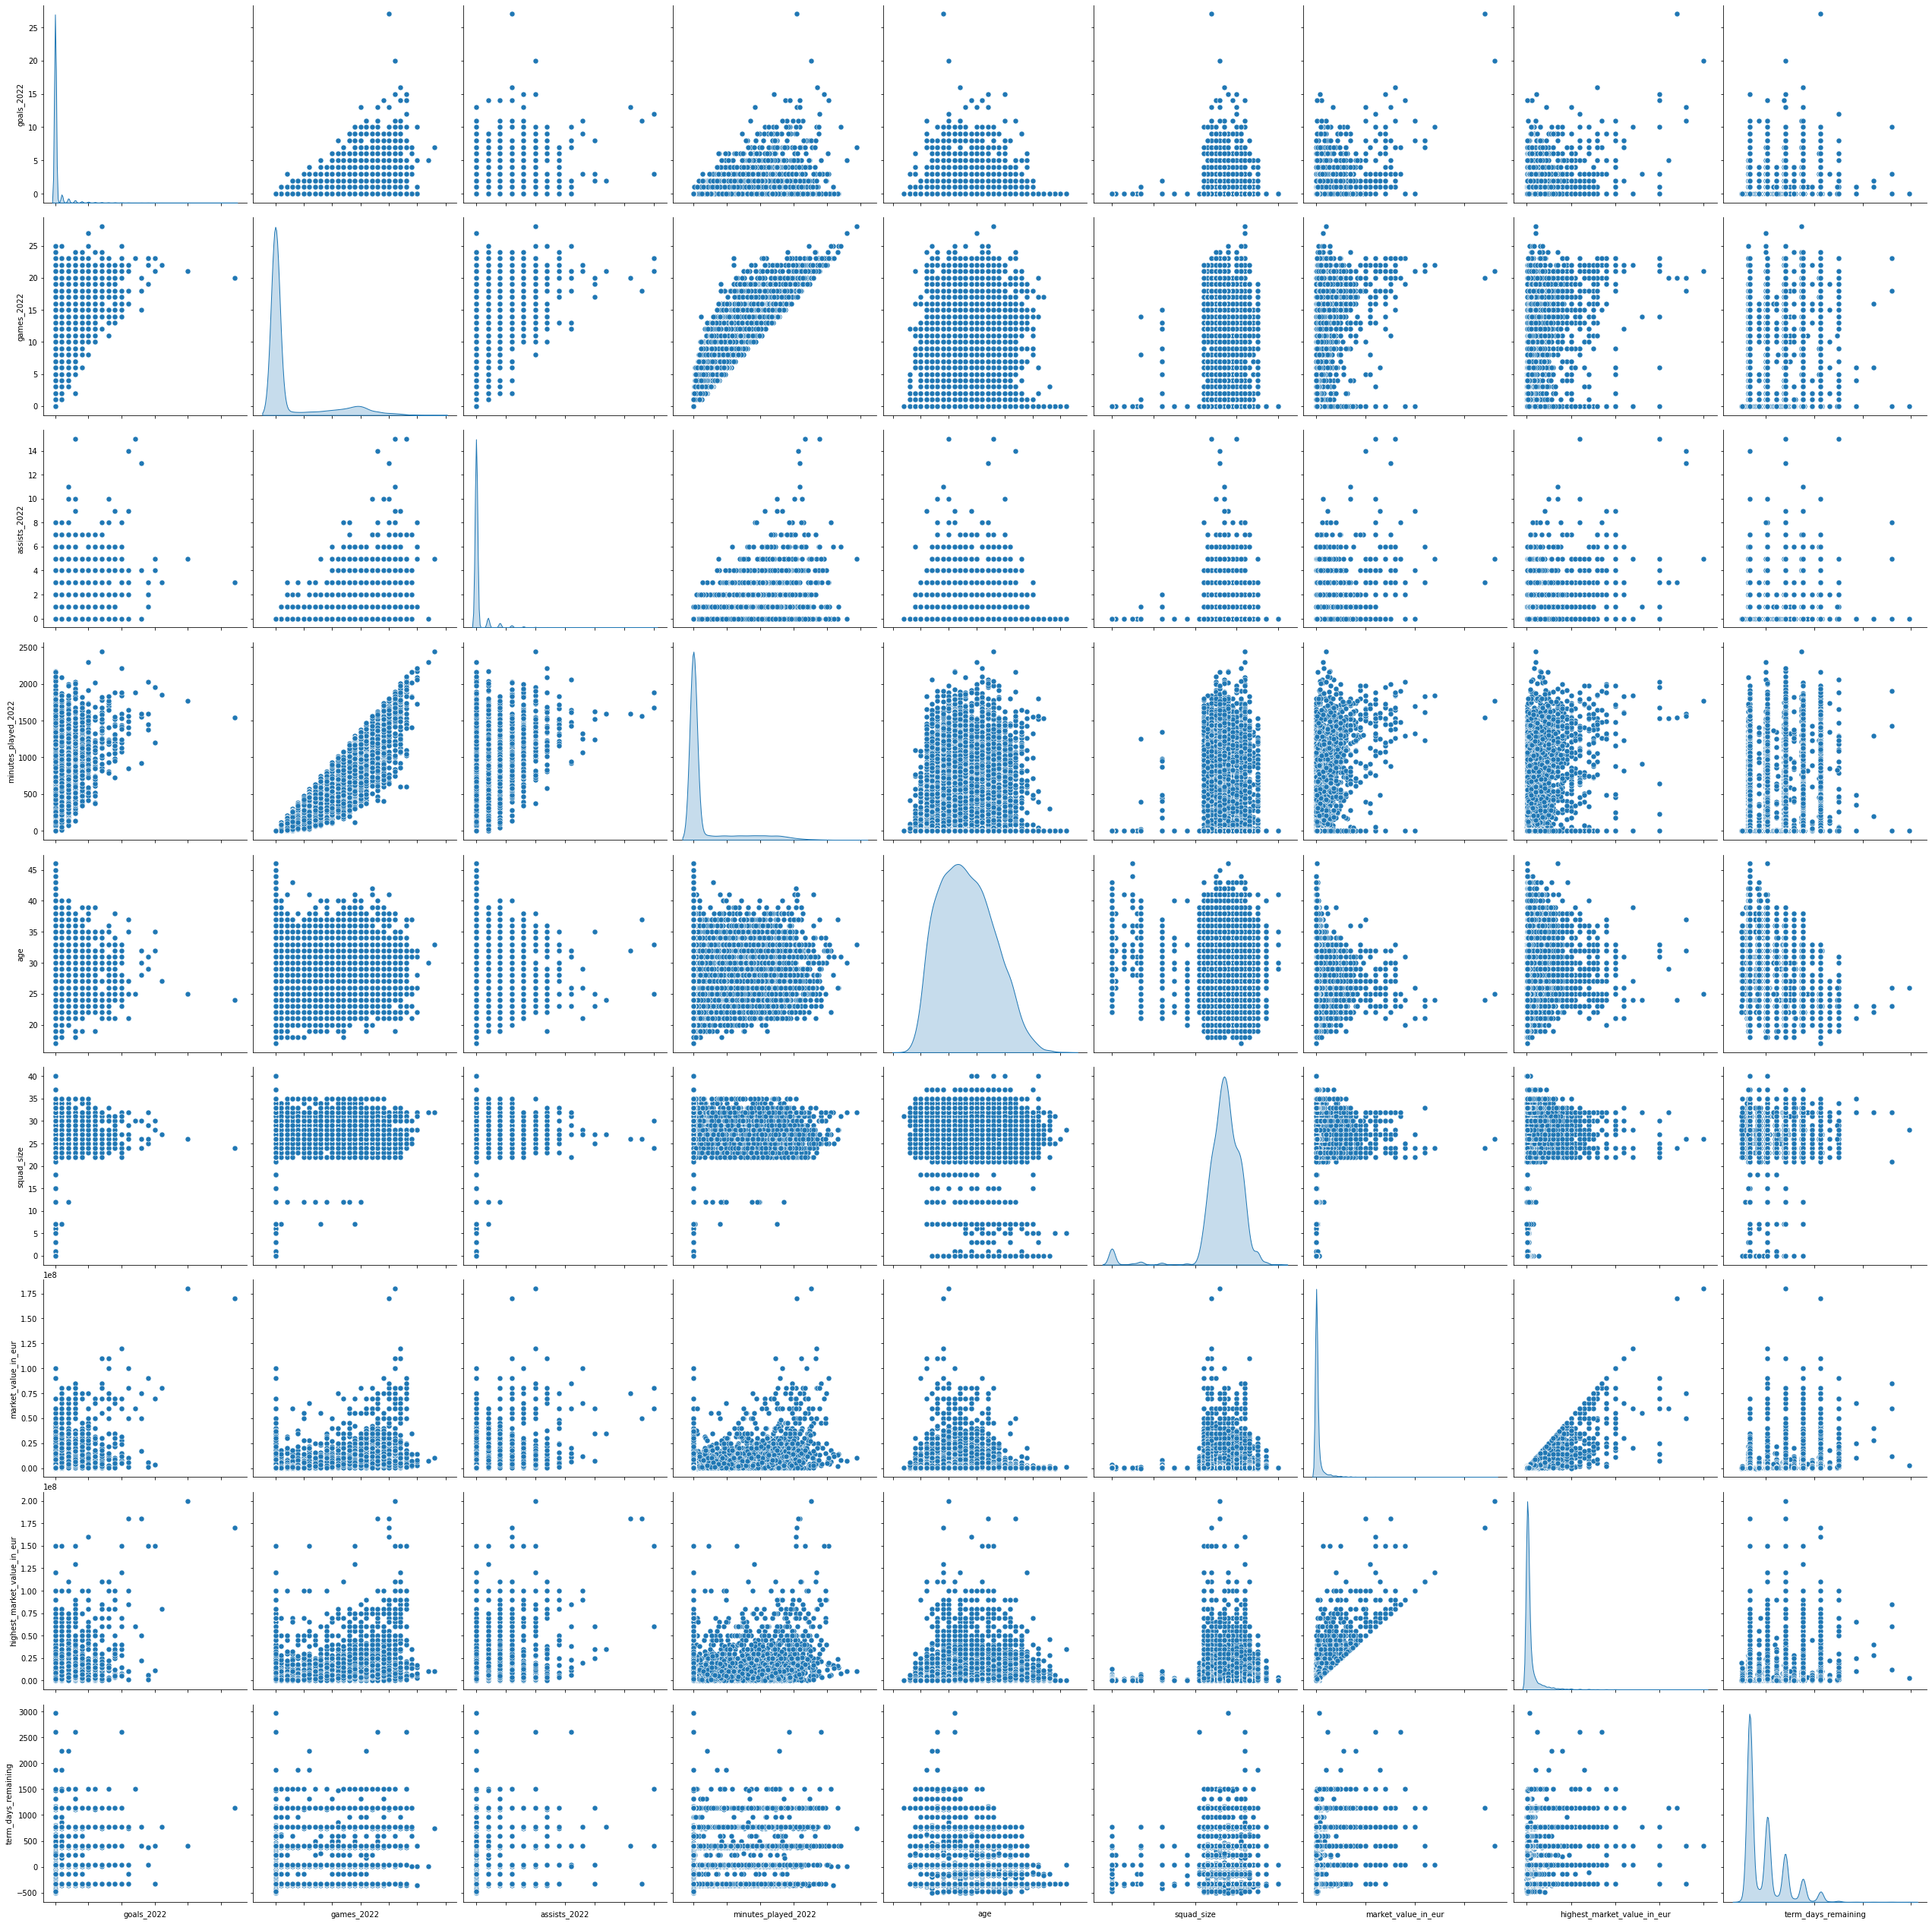

In [28]:
g = sns.pairplot(merged_players[[u'goals_2022', u'games_2022', u'assists_2022', u'minutes_played_2022',
                                 u'age', u'squad_size', u'market_value_in_eur', u'highest_market_value_in_eur',
                                 u'term_days_remaining']], palette = 'seismic', size=4, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=50))
g.set(xticklabels=[])

Pearson Correlation of Features

Index(['games_2022', 'minutes_played_2022', 'goals_2022', 'assists_2022', 'goals_against_2022', 'goals_for_2022', 'clean_sheet_2022', 'age', 'club_value', 'squad_size', 'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2022', 'red_cards_2022'], dtype='object')


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

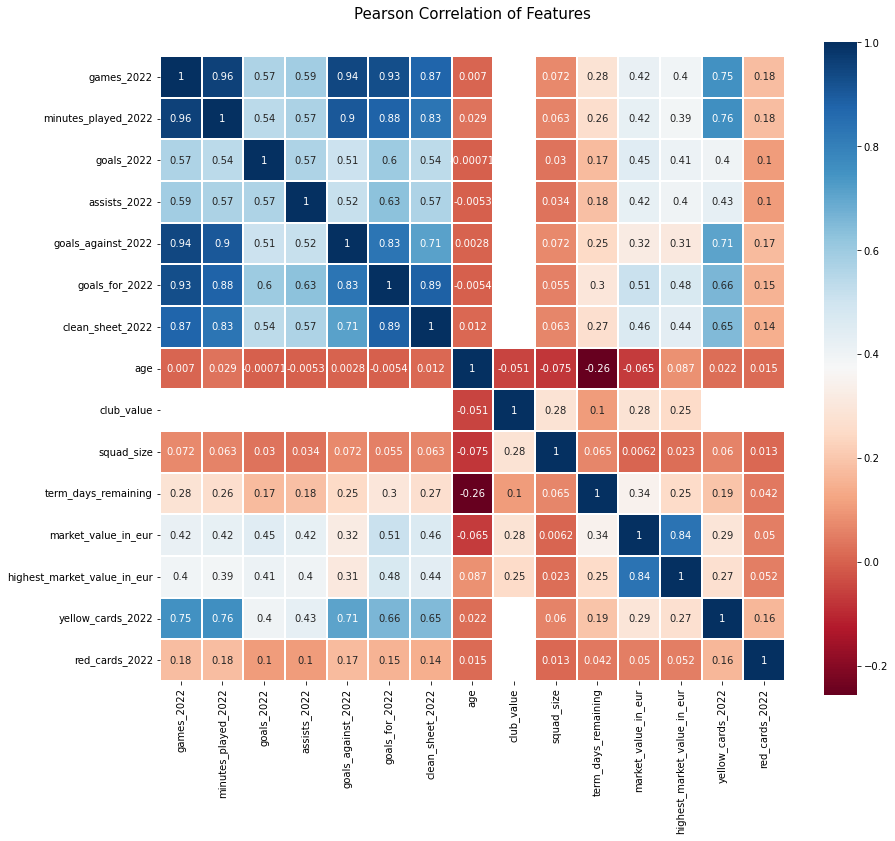

In [29]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
features_df=merged_players.drop(['player_id', 'name', 'position', 'sub_position', 'last_season', 'foot', 'height_in_cm', 'country_of_citizenship', 'country_of_birth',
                                 'current_club_name', 'current_club_domestic_competition_id', 'agent_name', 'contract_expiration_date'], axis=1)
print(features_df.columns)
sns.heatmap(features_df.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

Report on your data (2–4 pages). In this report, you need to show that you have explored the data to address all issues related to: missing values, outliers, treatment of categorical variables, possible transformation to continuous variables, feature selection, etc. At a minimum, you are expected to provide relevant graphs of your dependent variable, as well as graphs and descriptive statistics for all variables in your analysis. You are also expected to select a hold-out sample for testing purposes. Once selected, the holdout sample cannot be changed.

Having chosen the data, we are ready for more deep data processing

In [30]:
# First, drop nan for market vaue subset
merged_players=merged_players.dropna(subset=['market_value_in_eur'])

# The country data suggests filtering out 5 most valuable leagues
merged_players_1 = merged_players[merged_players['current_club_domestic_competition_id'].isin(['GB1', 'IT1', 'ES1', 'L1', 'FR1'])]

# Let's continue with the treatment of categorial variables
dummies = pd.get_dummies(merged_players_1[['position']], prefix_sep='_')
merged_players_1 = pd.concat([merged_players_1, dummies], axis=1)

dummies = pd.get_dummies(merged_players_1[['sub_position']], prefix_sep='_')
merged_players_1 = pd.concat([merged_players_1, dummies], axis=1)

dummies = pd.get_dummies(merged_players_1[['foot']], prefix_sep='_')
merged_players_1 = pd.concat([merged_players_1, dummies], axis=1)

In [31]:
# Let's add dummies for nationality, giving separate dummies only to those nations that have the biggest number of players, 'Other' dummy to other nations
nation_count = pd.DataFrame(merged_players_1.country_of_citizenship.value_counts())
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))
important_nations = nation_count.country[:10].tolist()
print(important_nations)
merged_players_1["nationality"] = merged_players_1.country_of_citizenship.map(lambda x: x if x in important_nations else "Other")
dummies = pd.get_dummies(merged_players_1[['nationality']], prefix_sep='_')
merged_players_1 = pd.concat([merged_players_1, dummies], axis=1)

['Spain', 'Italy', 'France', 'Germany', 'England', 'Brazil', 'Argentina', 'Portugal', 'Netherlands', 'Senegal']


In [32]:
# We continue with a dummy for current_club_domestic_competition_id
dummies = pd.get_dummies(merged_players_1[['current_club_domestic_competition_id']], prefix_sep='_')
merged_players_1 = pd.concat([merged_players_1, dummies], axis=1)

In [33]:
merged_players_1.columns

Index(['player_id', 'games_2022', 'minutes_played_2022', 'goals_2022', 'assists_2022', 'goals_against_2022', 'goals_for_2022', 'clean_sheet_2022', 'name', 'position', 'sub_position', 'last_season', 'foot', 'height_in_cm', 'age', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'club_value', 'squad_size', 'current_club_domestic_competition_id', 'agent_name', 'contract_expiration_date', 'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2022', 'red_cards_2022', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield', 'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield', 'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back', 'sub_position_Second Striker', 'foot_Both', 'foot_Left', 'foo

Finally, we are ready to create and split test and training data

In [34]:
numeric_columns = ['goals_2022', 'goals_against_2022', 'goals_for_2022', 'games_2022', 'assists_2022', 'minutes_played_2022', 'age', 'height_in_cm', 'squad_size',
                 'term_days_remaining', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield',
                   'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield',
                   'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back',
                   'sub_position_Second Striker', 'foot_Left', 'foot_Right', 'foot_Both', 'nationality_Argentina', 'nationality_Brazil', 'nationality_England',
                   'nationality_France', 'nationality_Germany', 'nationality_Italy', 'nationality_Netherlands', 'nationality_Other', 'nationality_Portugal',
                   'nationality_Senegal', 'nationality_Spain', 'current_club_domestic_competition_id_ES1', 'current_club_domestic_competition_id_FR1',
                   'current_club_domestic_competition_id_GB1', 'current_club_domestic_competition_id_IT1', 'current_club_domestic_competition_id_L1']
other_columns = ['last_season', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'current_club_domestic_competition_id', 'agent_name',
                 'contract_expiration_date']

X = merged_players_1[numeric_columns].fillna(-1000)
y = merged_players_1['market_value_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
comparisons_df = pd.DataFrame(columns=['model','accuracy'])

## Part 2
Preliminary cross-validated results using at least one algorithm.

Here we should provide some details regarding what is the performance measure of your choice and what learning algorithms you are planning to implement

#### Our modelling

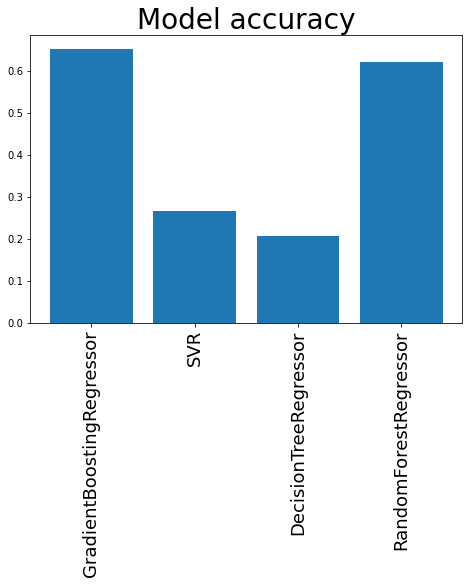

                       model  accuracy
0  GradientBoostingRegressor  0.640626
1                        SVR  0.267819
2      DecisionTreeRegressor  0.206428
3  GradientBoostingRegressor  0.653614
4      RandomForestRegressor  0.622961


In [35]:
gbr = GradientBoostingRegressor(random_state=0)
svr = SVR(kernel="linear", gamma="auto")
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(random_state=1)
XGBR = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.04, random_state=1)


models=[gbr, svr, dtr, XGBR, rfr]
for model in models:
    model.fit(X_train, y_train)
    comparisons_df.loc[len(comparisons_df)] = [model.__class__.__name__,model.score(X_test, y_test)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = comparisons_df.model
y = comparisons_df.accuracy
ax.bar(x,y)
plt.xticks(fontsize=18, rotation=90)
plt.title('Model accuracy',fontsize=28)
plt.show()
print(comparisons_df)

In [39]:
importances = gbr.feature_importances_
importances
formatted_importances = [f'{val:.2f}' for val in importances]
print(formatted_importances)

['0.14', '0.03', '0.47', '0.02', '0.02', '0.09', '0.07', '0.00', '0.02', '0.07', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.04', '0.00', '0.00']


In [41]:
importances = dtr.feature_importances_
importances
formatted_importances = [f'{val:.2f}' for val in importances]
print(formatted_importances)

['0.13', '0.03', '0.42', '0.02', '0.01', '0.03', '0.06', '0.03', '0.04', '0.07', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00', '0.01', '0.01', '0.00', '0.00', '0.01', '0.01', '0.00', '0.00', '0.01', '0.01', '0.04', '0.00', '0.00']


In [42]:
importances = rfr.feature_importances_
importances
formatted_importances = [f'{val:.2f}' for val in importances]
print(formatted_importances)

['0.11', '0.02', '0.41', '0.02', '0.02', '0.06', '0.07', '0.04', '0.04', '0.06', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.01', '0.00', '0.01', '0.01', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00', '0.01', '0.00', '0.03', '0.00', '0.00']


In [43]:
importances = XGBR.feature_importances_
importances
formatted_importances = [f'{val:.2f}' for val in importances]
print(formatted_importances)

['0.13', '0.03', '0.43', '0.02', '0.02', '0.10', '0.07', '0.01', '0.02', '0.07', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.01', '0.00', '0.04', '0.00', '0.00']


**Important note:** we have found out that our model predicts England league much better than other. Due to this fact, we also show code where current_club_domestic_competition_id=='GB1'

In [36]:
# The country data suggests filtering out Gb players
merged_players_2 = merged_players[(merged_players.current_club_domestic_competition_id=='GB1')]

# Let's continue with the treatment of categorial variables
dummies = pd.get_dummies(merged_players_2[['position']], prefix_sep='_')
merged_players_2 = pd.concat([merged_players_2, dummies], axis=1)

dummies = pd.get_dummies(merged_players_2[['sub_position']], prefix_sep='_')
merged_players_2 = pd.concat([merged_players_2, dummies], axis=1)

dummies = pd.get_dummies(merged_players_2[['foot']], prefix_sep='_')
merged_players_2 = pd.concat([merged_players_2, dummies], axis=1)

In [37]:
# Let's add dummies for nationaluty, giving separate dummies only to those nations that have the biggest number of players, 'Other' dummy to other nations
nation_count = pd.DataFrame(merged_players_2.country_of_citizenship.value_counts())
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))
important_nations = nation_count.country[:10].tolist()
print(important_nations)
merged_players_2["nationality"] = merged_players_2.country_of_citizenship.map(lambda x: x if x in important_nations else "Other")
dummies = pd.get_dummies(merged_players_2[['nationality']], prefix_sep='_')
merged_players_2 = pd.concat([merged_players_2, dummies], axis=1)

['England', 'Ireland', 'Brazil', 'Wales', 'Scotland', 'Spain', 'France', 'Portugal', 'Germany', 'Netherlands']


In [38]:
merged_players_2.columns

Index(['player_id', 'games_2022', 'minutes_played_2022', 'goals_2022', 'assists_2022', 'goals_against_2022', 'goals_for_2022', 'clean_sheet_2022', 'name', 'position', 'sub_position', 'last_season', 'foot', 'height_in_cm', 'age', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'club_value', 'squad_size', 'current_club_domestic_competition_id', 'agent_name', 'contract_expiration_date', 'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2022', 'red_cards_2022', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield', 'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield', 'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back', 'sub_position_Second Striker', 'foot_Both', 'foot_Left', 'foo

In [39]:
numeric_columns = ['goals_2022', 'goals_against_2022', 'goals_for_2022', 'games_2022', 'assists_2022', 'minutes_played_2022', 'age', 'height_in_cm', 'squad_size',
                 'term_days_remaining', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield',
                   'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield',
                   'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back',
                   'sub_position_Second Striker', 'foot_Left', 'foot_Right', 'foot_Both', 'nationality_Brazil', 'nationality_England', 'nationality_France',
                   'nationality_Germany', 'nationality_Ireland', 'nationality_Netherlands', 'nationality_Other', 'nationality_Portugal', 'nationality_Scotland',
                   'nationality_Spain', 'nationality_Wales']
other_columns = ['last_season', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'current_club_domestic_competition_id', 'agent_name',
                 'contract_expiration_date']

X = merged_players_2[numeric_columns].fillna(-1000)
y = merged_players_2['market_value_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
comparisons_df = pd.DataFrame(columns=['model','accuracy'])

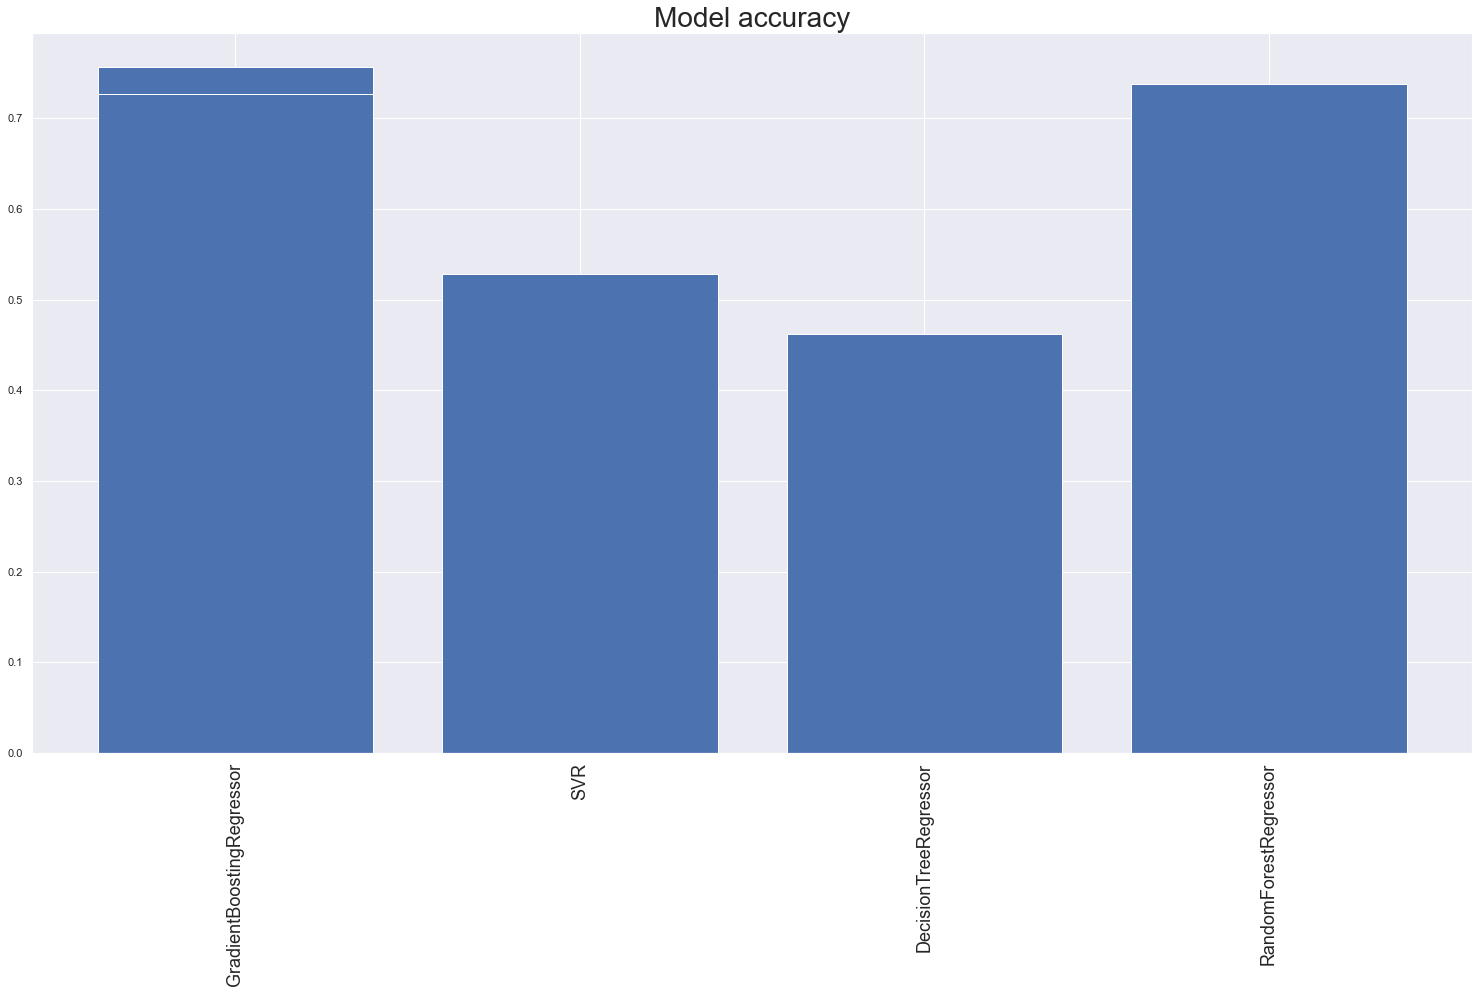

                       model  accuracy
0  GradientBoostingRegressor  0.755859
1                        SVR  0.527850
2      DecisionTreeRegressor  0.461759
3  GradientBoostingRegressor  0.726301
4      RandomForestRegressor  0.737378


In [41]:
gbr = GradientBoostingRegressor(random_state=0)
svr = SVR(kernel="linear", gamma="auto")
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(random_state=1)
XGBR = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.04, random_state=1)


models=[gbr, svr, dtr, XGBR, rfr]
for model in models:
    model.fit(X_train, y_train)
    comparisons_df.loc[len(comparisons_df)] = [model.__class__.__name__,model.score(X_test, y_test)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = comparisons_df.model
y = comparisons_df.accuracy
ax.bar(x,y)
plt.xticks(fontsize=18, rotation=90)
plt.title('Model accuracy',fontsize=28)
plt.show()
print(comparisons_df)

In [43]:
# The country data suggests filtering out Gb players
merged_players_3 = merged_players[(merged_players.current_club_domestic_competition_id=='IT1')]

# Let's continue with the treatment of categorial variables
dummies = pd.get_dummies(merged_players_3[['position']], prefix_sep='_')
merged_players_3 = pd.concat([merged_players_3, dummies], axis=1)

dummies = pd.get_dummies(merged_players_3[['sub_position']], prefix_sep='_')
merged_players_3 = pd.concat([merged_players_3, dummies], axis=1)

dummies = pd.get_dummies(merged_players_3[['foot']], prefix_sep='_')
merged_players_3 = pd.concat([merged_players_3, dummies], axis=1)

In [44]:
# Let's add dummies for nationaluty, giving separate dummies only to those nations that have the biggest number of players, 'Other' dummy to other nations
nation_count = pd.DataFrame(merged_players_3.country_of_citizenship.value_counts())
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))
important_nations = nation_count.country[:10].tolist()
print(important_nations)
merged_players_3["nationality"] = merged_players_3.country_of_citizenship.map(lambda x: x if x in important_nations else "Other")
dummies = pd.get_dummies(merged_players_3[['nationality']], prefix_sep='_')
merged_players_3 = pd.concat([merged_players_3, dummies], axis=1)

['Italy', 'Brazil', 'Argentina', 'France', 'Croatia', 'Poland', 'Serbia', 'Spain', 'Uruguay', 'Slovenia']


In [45]:
merged_players_3.columns

Index(['player_id', 'games_2022', 'minutes_played_2022', 'goals_2022', 'assists_2022', 'goals_against_2022', 'goals_for_2022', 'clean_sheet_2022', 'name', 'position', 'sub_position', 'last_season', 'foot', 'height_in_cm', 'age', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'club_value', 'squad_size', 'current_club_domestic_competition_id', 'agent_name', 'contract_expiration_date', 'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2022', 'red_cards_2022', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield', 'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield', 'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back', 'sub_position_Second Striker', 'foot_Both', 'foot_Left', 'foo

In [47]:
numeric_columns = ['goals_2022', 'goals_against_2022', 'goals_for_2022', 'games_2022', 'assists_2022', 'minutes_played_2022', 'age', 'height_in_cm', 'squad_size',
                 'term_days_remaining', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield',
                   'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield',
                   'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back',
                   'sub_position_Second Striker', 'foot_Left', 'foot_Right', 'foot_Both', 'nationality_Argentina', 'nationality_Brazil', 'nationality_Croatia', 'nationality_France', 'nationality_Italy', 'nationality_Other', 'nationality_Poland',
       'nationality_Serbia', 'nationality_Slovenia', 'nationality_Spain', 'nationality_Uruguay']
other_columns = ['last_season', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'current_club_domestic_competition_id', 'agent_name',
                 'contract_expiration_date']

X = merged_players_3[numeric_columns].fillna(-1000)
y = merged_players_3['market_value_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
comparisons_df = pd.DataFrame(columns=['model','accuracy'])

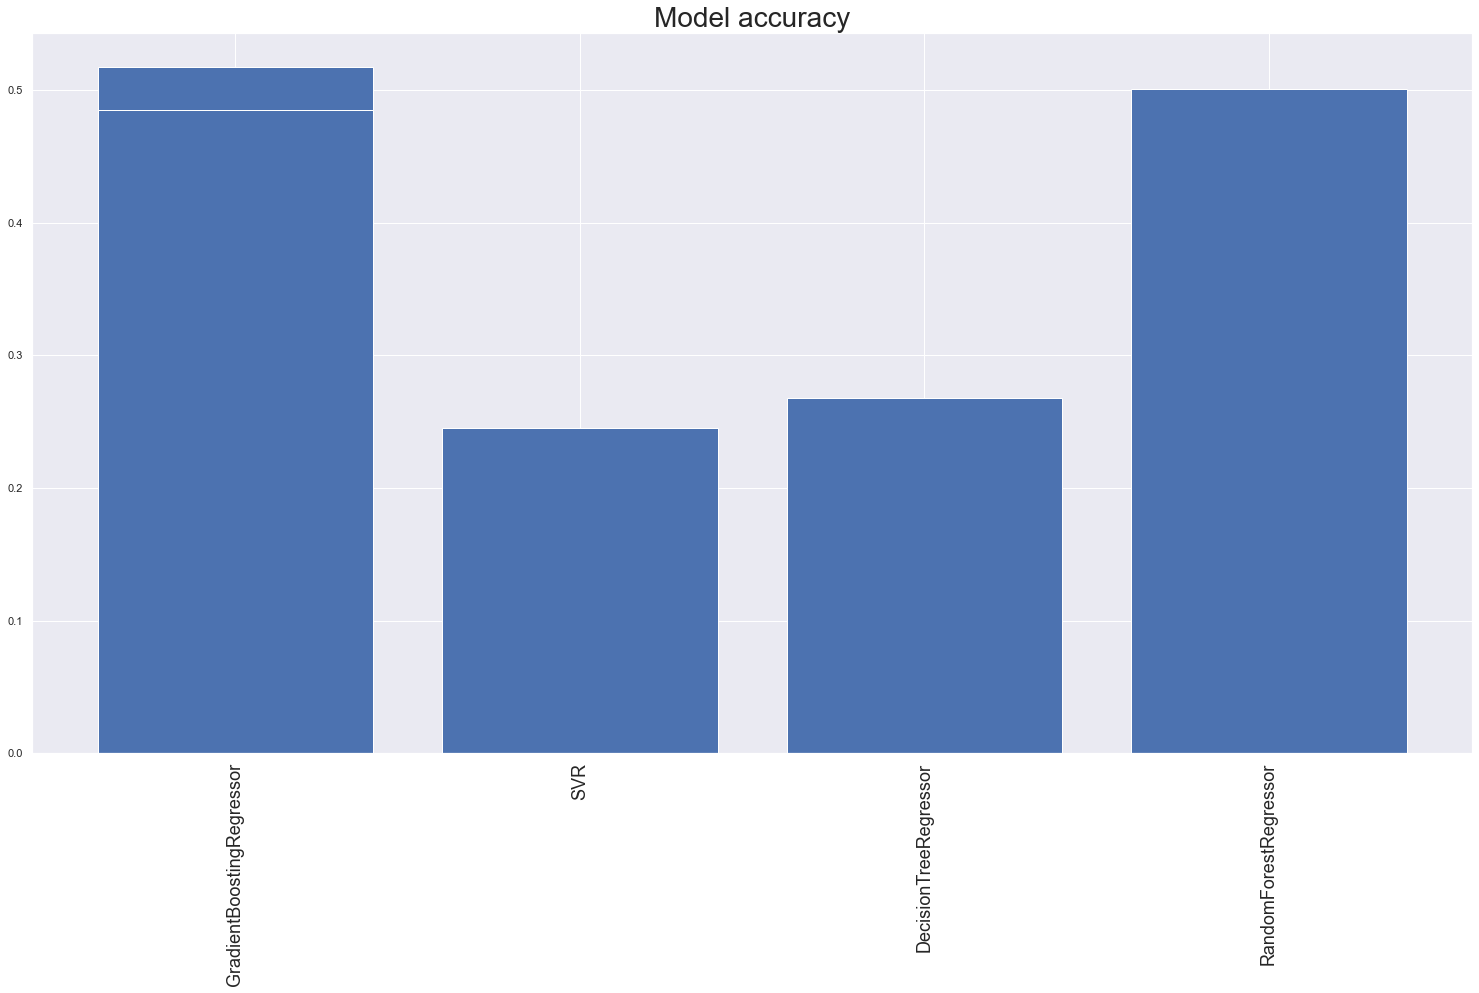

                       model  accuracy
0  GradientBoostingRegressor  0.517195
1                        SVR  0.245157
2      DecisionTreeRegressor  0.267556
3  GradientBoostingRegressor  0.484824
4      RandomForestRegressor  0.501018


In [48]:
gbr = GradientBoostingRegressor(random_state=0)
svr = SVR(kernel="linear", gamma="auto")
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(random_state=1)
XGBR = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.04, random_state=1)


models=[gbr, svr, dtr, XGBR, rfr]
for model in models:
    model.fit(X_train, y_train)
    comparisons_df.loc[len(comparisons_df)] = [model.__class__.__name__,model.score(X_test, y_test)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = comparisons_df.model
y = comparisons_df.accuracy
ax.bar(x,y)
plt.xticks(fontsize=18, rotation=90)
plt.title('Model accuracy',fontsize=28)
plt.show()
print(comparisons_df)

In [49]:
# The country data suggests filtering out Gb players
merged_players_4 = merged_players[(merged_players.current_club_domestic_competition_id=='ES1')]

# Let's continue with the treatment of categorial variables
dummies = pd.get_dummies(merged_players_4[['position']], prefix_sep='_')
merged_players_4 = pd.concat([merged_players_4, dummies], axis=1)

dummies = pd.get_dummies(merged_players_4[['sub_position']], prefix_sep='_')
merged_players_4 = pd.concat([merged_players_4, dummies], axis=1)

dummies = pd.get_dummies(merged_players_4[['foot']], prefix_sep='_')
merged_players_4 = pd.concat([merged_players_4, dummies], axis=1)

In [50]:
# Let's add dummies for nationaluty, giving separate dummies only to those nations that have the biggest number of players, 'Other' dummy to other nations
nation_count = pd.DataFrame(merged_players_4.country_of_citizenship.value_counts())
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))
important_nations = nation_count.country[:10].tolist()
print(important_nations)
merged_players_4["nationality"] = merged_players_4.country_of_citizenship.map(lambda x: x if x in important_nations else "Other")
dummies = pd.get_dummies(merged_players_4[['nationality']], prefix_sep='_')
merged_players_4 = pd.concat([merged_players_4, dummies], axis=1)

['Spain', 'Argentina', 'Brazil', 'Uruguay', 'Serbia', 'France', 'Colombia', 'Morocco', 'Senegal', 'Portugal']


In [51]:
merged_players_4.columns

Index(['player_id', 'games_2022', 'minutes_played_2022', 'goals_2022', 'assists_2022', 'goals_against_2022', 'goals_for_2022', 'clean_sheet_2022', 'name', 'position', 'sub_position', 'last_season', 'foot', 'height_in_cm', 'age', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'club_value', 'squad_size', 'current_club_domestic_competition_id', 'agent_name', 'contract_expiration_date', 'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2022', 'red_cards_2022', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield', 'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield', 'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Winger', 'sub_position_Right-Back', 'sub_position_Second Striker', 'foot_Both', 'foot_Left', 'foot_Right', 'nationality', 'natio

In [53]:
numeric_columns = ['goals_2022', 'goals_against_2022', 'goals_for_2022', 'games_2022', 'assists_2022', 'minutes_played_2022', 'age', 'height_in_cm', 'squad_size',
                 'term_days_remaining', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield',
                   'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield',
                   'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Winger', 'sub_position_Right-Back',
                   'sub_position_Second Striker', 'foot_Left', 'foot_Right', 'foot_Both', 'nationality_Argentina', 'nationality_Brazil', 'nationality_Colombia', 'nationality_France', 'nationality_Morocco', 'nationality_Other', 'nationality_Portugal', 'nationality_Senegal', 'nationality_Serbia',
       'nationality_Spain', 'nationality_Uruguay']
other_columns = ['last_season', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'current_club_domestic_competition_id', 'agent_name',
                 'contract_expiration_date']

X = merged_players_4[numeric_columns].fillna(-1000)
y = merged_players_4['market_value_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
comparisons_df = pd.DataFrame(columns=['model','accuracy'])

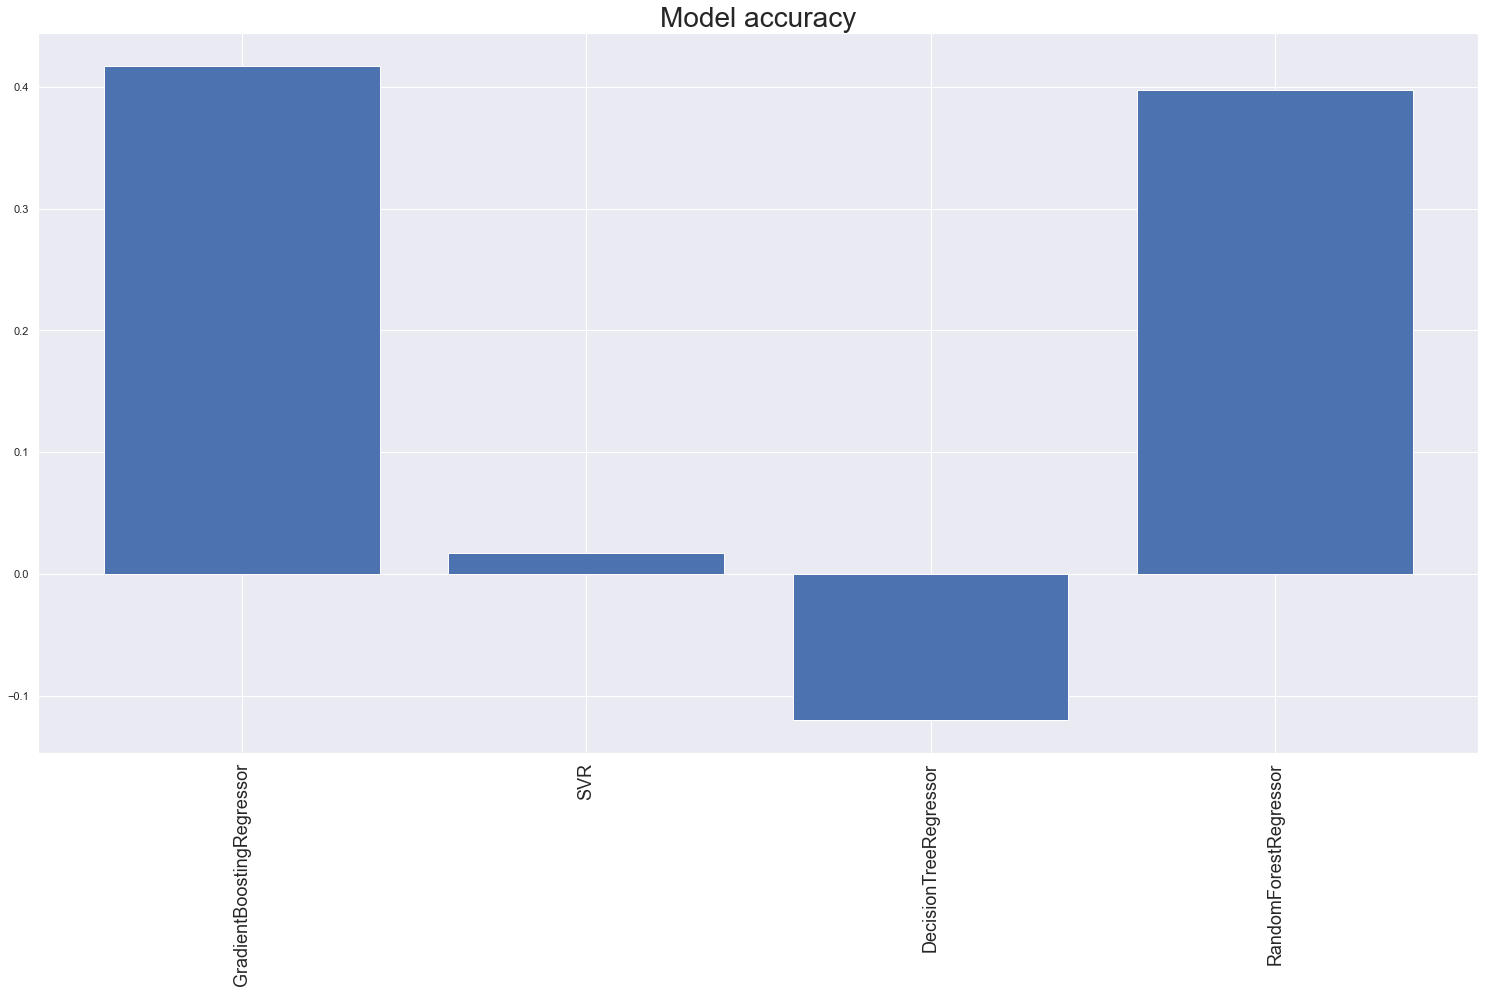

                       model  accuracy
0  GradientBoostingRegressor  0.383294
1                        SVR  0.017059
2      DecisionTreeRegressor -0.119941
3  GradientBoostingRegressor  0.417089
4      RandomForestRegressor  0.397475


In [54]:
gbr = GradientBoostingRegressor(random_state=0)
svr = SVR(kernel="linear", gamma="auto")
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(random_state=1)
XGBR = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.04, random_state=1)


models=[gbr, svr, dtr, XGBR, rfr]
for model in models:
    model.fit(X_train, y_train)
    comparisons_df.loc[len(comparisons_df)] = [model.__class__.__name__,model.score(X_test, y_test)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = comparisons_df.model
y = comparisons_df.accuracy
ax.bar(x,y)
plt.xticks(fontsize=18, rotation=90)
plt.title('Model accuracy',fontsize=28)
plt.show()
print(comparisons_df)

In [55]:
# The country data suggests filtering out Gb players
merged_players_5 = merged_players[(merged_players.current_club_domestic_competition_id=='FR1')]

# Let's continue with the treatment of categorial variables
dummies = pd.get_dummies(merged_players_5[['position']], prefix_sep='_')
merged_players_5 = pd.concat([merged_players_5, dummies], axis=1)

dummies = pd.get_dummies(merged_players_5[['sub_position']], prefix_sep='_')
merged_players_5 = pd.concat([merged_players_5, dummies], axis=1)

dummies = pd.get_dummies(merged_players_5[['foot']], prefix_sep='_')
merged_players_5 = pd.concat([merged_players_5, dummies], axis=1)

In [56]:
# Let's add dummies for nationaluty, giving separate dummies only to those nations that have the biggest number of players, 'Other' dummy to other nations
nation_count = pd.DataFrame(merged_players_5.country_of_citizenship.value_counts())
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))
important_nations = nation_count.country[:10].tolist()
print(important_nations)
merged_players_5["nationality"] = merged_players_5.country_of_citizenship.map(lambda x: x if x in important_nations else "Other")
dummies = pd.get_dummies(merged_players_5[['nationality']], prefix_sep='_')
merged_players_5 = pd.concat([merged_players_5, dummies], axis=1)

['France', 'Senegal', 'Brazil', 'Algeria', 'Morocco', 'Mali', 'Cameroon', "Cote d'Ivoire", 'Portugal', 'Spain']


In [57]:
merged_players_5.columns

Index(['player_id', 'games_2022', 'minutes_played_2022', 'goals_2022', 'assists_2022', 'goals_against_2022', 'goals_for_2022', 'clean_sheet_2022', 'name', 'position', 'sub_position', 'last_season', 'foot', 'height_in_cm', 'age', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'club_value', 'squad_size', 'current_club_domestic_competition_id', 'agent_name', 'contract_expiration_date', 'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2022', 'red_cards_2022', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield', 'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield', 'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back', 'sub_position_Second Striker', 'foot_Both', 'foot_Left', 'foo

In [59]:
numeric_columns = ['goals_2022', 'goals_against_2022', 'goals_for_2022', 'games_2022', 'assists_2022', 'minutes_played_2022', 'age', 'height_in_cm', 'squad_size',
                 'term_days_remaining', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield',
                   'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield',
                   'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back',
                   'sub_position_Second Striker', 'foot_Left', 'foot_Right', 'foot_Both', 'nationality_Algeria', 'nationality_Brazil', 'nationality_Cameroon', 'nationality_France', 'nationality_Mali', 'nationality_Morocco',
       'nationality_Other', 'nationality_Portugal', 'nationality_Senegal', 'nationality_Spain']
other_columns = ['last_season', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'current_club_domestic_competition_id', 'agent_name',
                 'contract_expiration_date']

X = merged_players_5[numeric_columns].fillna(-1000)
y = merged_players_5['market_value_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
comparisons_df = pd.DataFrame(columns=['model','accuracy'])

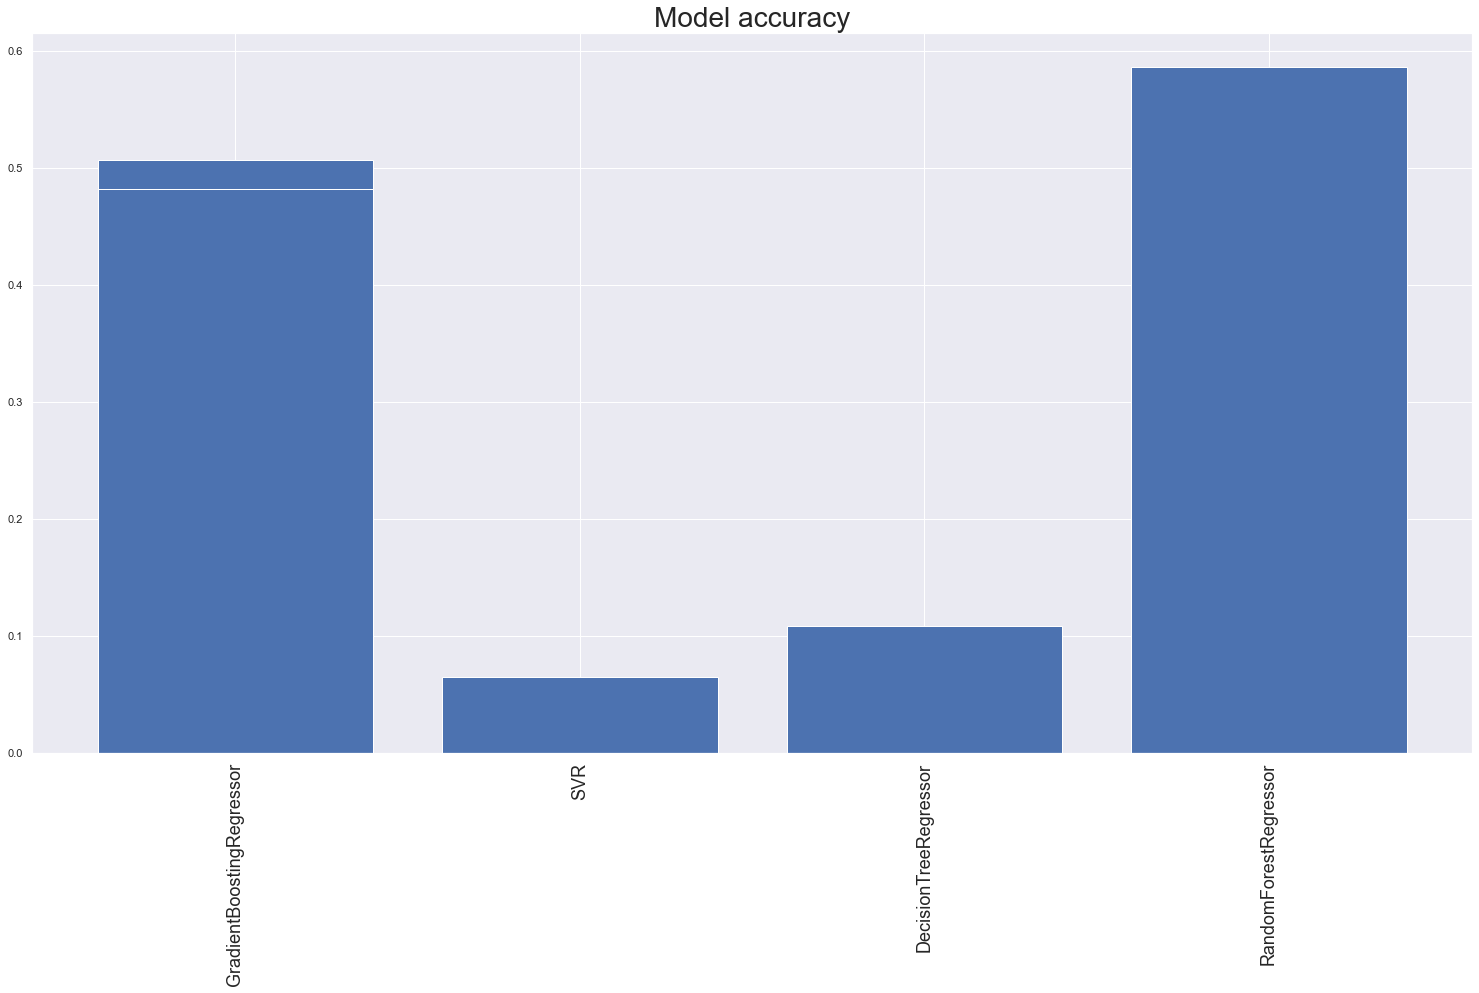

                       model  accuracy
0  GradientBoostingRegressor  0.506831
1                        SVR  0.065370
2      DecisionTreeRegressor  0.108530
3  GradientBoostingRegressor  0.482178
4      RandomForestRegressor  0.585925


In [60]:
gbr = GradientBoostingRegressor(random_state=0)
svr = SVR(kernel="linear", gamma="auto")
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(random_state=1)
XGBR = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.04, random_state=1)


models=[gbr, svr, dtr, XGBR, rfr]
for model in models:
    model.fit(X_train, y_train)
    comparisons_df.loc[len(comparisons_df)] = [model.__class__.__name__,model.score(X_test, y_test)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = comparisons_df.model
y = comparisons_df.accuracy
ax.bar(x,y)
plt.xticks(fontsize=18, rotation=90)
plt.title('Model accuracy',fontsize=28)
plt.show()
print(comparisons_df)

In [61]:
# The country data suggests filtering out Gb players
merged_players_6 = merged_players[(merged_players.current_club_domestic_competition_id=='L1')]

# Let's continue with the treatment of categorial variables
dummies = pd.get_dummies(merged_players_6[['position']], prefix_sep='_')
merged_players_6 = pd.concat([merged_players_6, dummies], axis=1)

dummies = pd.get_dummies(merged_players_6[['sub_position']], prefix_sep='_')
merged_players_6 = pd.concat([merged_players_6, dummies], axis=1)

dummies = pd.get_dummies(merged_players_6[['foot']], prefix_sep='_')
merged_players_6 = pd.concat([merged_players_6, dummies], axis=1)

In [62]:
# Let's add dummies for nationaluty, giving separate dummies only to those nations that have the biggest number of players, 'Other' dummy to other nations
nation_count = pd.DataFrame(merged_players_6.country_of_citizenship.value_counts())
nation_count["hue"] = np.array([10]*10 + [0]*(len(nation_count)-10))
nation_count["country"] = nation_count.index
nation_count.index = range(len(nation_count))
important_nations = nation_count.country[:10].tolist()
print(important_nations)
merged_players_6["nationality"] = merged_players_6.country_of_citizenship.map(lambda x: x if x in important_nations else "Other")
dummies = pd.get_dummies(merged_players_6[['nationality']], prefix_sep='_')
merged_players_6 = pd.concat([merged_players_6, dummies], axis=1)

['Germany', 'France', 'Austria', 'Switzerland', 'Netherlands', 'United States', 'Croatia', 'Japan', 'Denmark', 'Turkey']


In [63]:
merged_players_6.columns

Index(['player_id', 'games_2022', 'minutes_played_2022', 'goals_2022', 'assists_2022', 'goals_against_2022', 'goals_for_2022', 'clean_sheet_2022', 'name', 'position', 'sub_position', 'last_season', 'foot', 'height_in_cm', 'age', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'club_value', 'squad_size', 'current_club_domestic_competition_id', 'agent_name', 'contract_expiration_date', 'term_days_remaining', 'market_value_in_eur', 'highest_market_value_in_eur', 'yellow_cards_2022', 'red_cards_2022', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield', 'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield', 'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back', 'sub_position_Second Striker', 'foot_Both', 'foot_Left', 'foo

In [64]:
numeric_columns = ['goals_2022', 'goals_against_2022', 'goals_for_2022', 'games_2022', 'assists_2022', 'minutes_played_2022', 'age', 'height_in_cm', 'squad_size',
                 'term_days_remaining', 'position_Attack', 'position_Defender', 'position_Goalkeeper', 'position_Midfield', 'sub_position_Attacking Midfield',
                   'sub_position_Central Midfield', 'sub_position_Centre-Back', 'sub_position_Centre-Forward', 'sub_position_Defensive Midfield', 'sub_position_Left Midfield',
                   'sub_position_Left Winger', 'sub_position_Left-Back', 'sub_position_Right Midfield', 'sub_position_Right Winger', 'sub_position_Right-Back',
                   'sub_position_Second Striker', 'foot_Left', 'foot_Right', 'foot_Both', 'nationality_Austria', 'nationality_Croatia', 'nationality_Denmark', 'nationality_France', 'nationality_Germany', 'nationality_Japan', 'nationality_Netherlands',
       'nationality_Other', 'nationality_Switzerland', 'nationality_Turkey', 'nationality_United States']
other_columns = ['last_season', 'country_of_citizenship', 'country_of_birth', 'current_club_name', 'current_club_domestic_competition_id', 'agent_name',
                 'contract_expiration_date']

X = merged_players_6[numeric_columns].fillna(-1000)
y = merged_players_6['market_value_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
comparisons_df = pd.DataFrame(columns=['model','accuracy'])

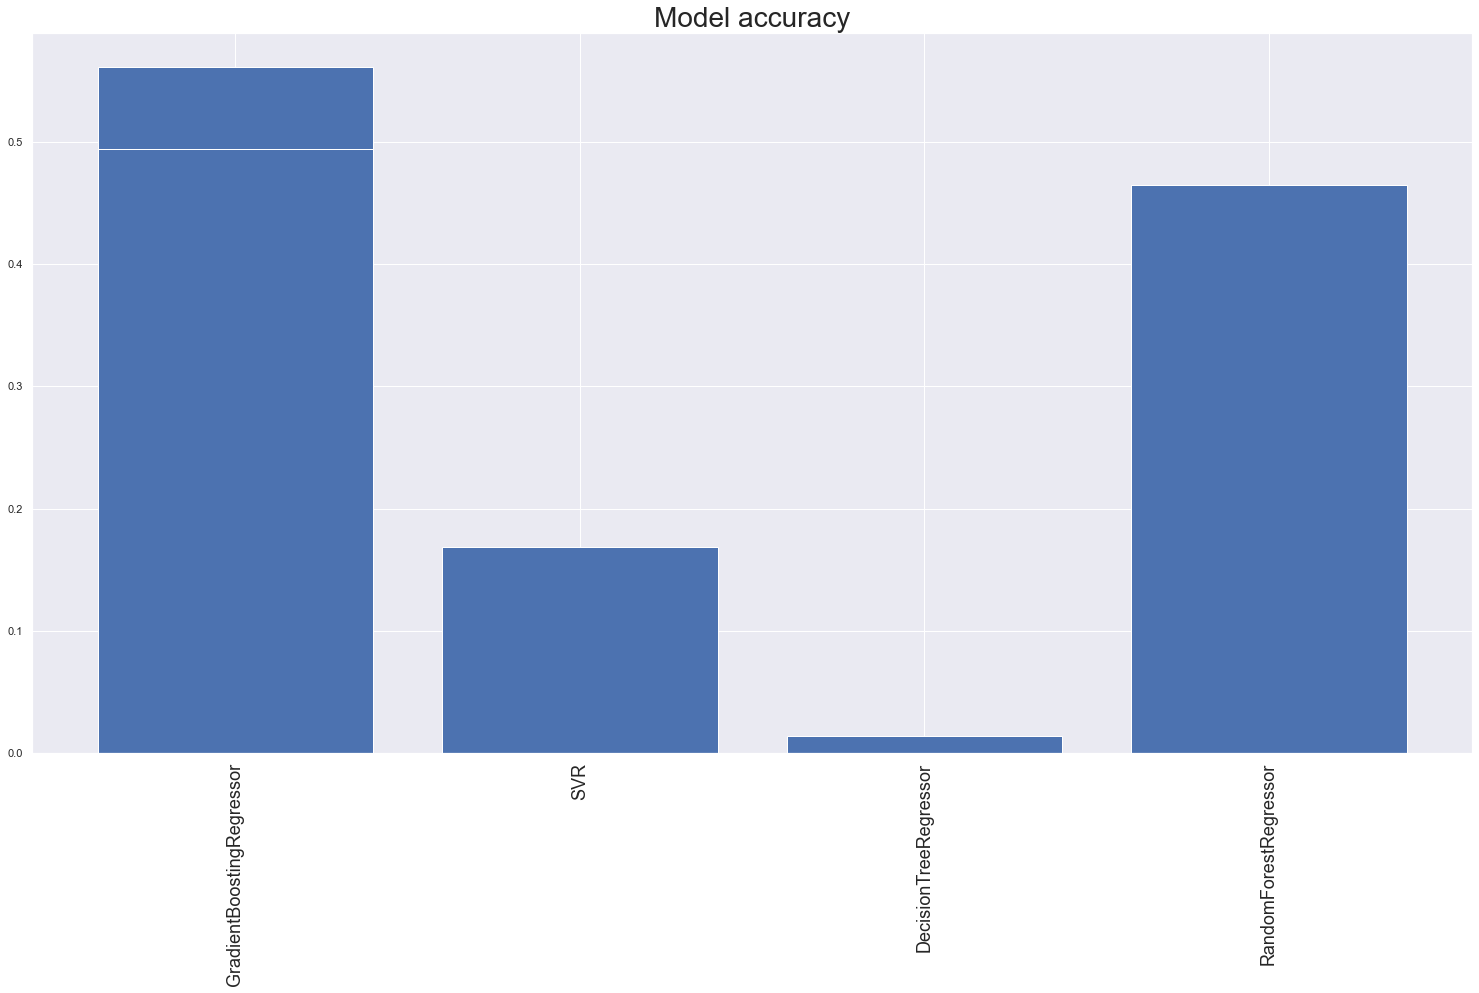

                       model  accuracy
0  GradientBoostingRegressor  0.560628
1                        SVR  0.168421
2      DecisionTreeRegressor  0.013945
3  GradientBoostingRegressor  0.494272
4      RandomForestRegressor  0.464851


In [65]:
gbr = GradientBoostingRegressor(random_state=0)
svr = SVR(kernel="linear", gamma="auto")
dtr = DecisionTreeRegressor(random_state=0)
rfr = RandomForestRegressor(random_state=1)
XGBR = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.04, random_state=1)


models=[gbr, svr, dtr, XGBR, rfr]
for model in models:
    model.fit(X_train, y_train)
    comparisons_df.loc[len(comparisons_df)] = [model.__class__.__name__,model.score(X_test, y_test)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = comparisons_df.model
y = comparisons_df.accuracy
ax.bar(x,y)
plt.xticks(fontsize=18, rotation=90)
plt.title('Model accuracy',fontsize=28)
plt.show()
print(comparisons_df)

In [ ]:
# The country data suggests filtering out Gb players
merged_players_2 = merged_players[(merged_players.current_club_domestic_competition_id=='GB1')]

# Let's continue with the treatment of categorial variables
dummies = pd.get_dummies(merged_players_2[['position']], prefix_sep='_')
merged_players_2 = pd.concat([merged_players_2, dummies], axis=1)

dummies = pd.get_dummies(merged_players_2[['sub_position']], prefix_sep='_')
merged_players_2 = pd.concat([merged_players_2, dummies], axis=1)

dummies = pd.get_dummies(merged_players_2[['foot']], prefix_sep='_')
merged_players_2 = pd.concat([merged_players_2, dummies], axis=1)